# EXERCISE 1

# PARTE 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
url = 'Exam1_df/data.csv'
dataset = pd.read_csv(url)

In [40]:
dataset.describe(include= 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,294,294,294,294,294,294,294.000000,294,294,294,294.000000
unique,NaN,NaN,NaN,32,154,3,4,72,3,NaN,4,2,4,NaN
top,NaN,NaN,NaN,120,?,0,0,150,0,NaN,?,?,?,NaN
freq,NaN,NaN,NaN,65,23,266,235,29,204,NaN,190,291,266,NaN
mean,47.826531,0.724490,2.982993,NaN,NaN,NaN,NaN,NaN,NaN,0.586054,NaN,NaN,NaN,0.360544
std,7.811812,0.447533,0.965117,NaN,NaN,NaN,NaN,NaN,NaN,0.908648,NaN,NaN,NaN,0.480977
min,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,42.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,49.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
75%,54.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000


In [37]:
dataset.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


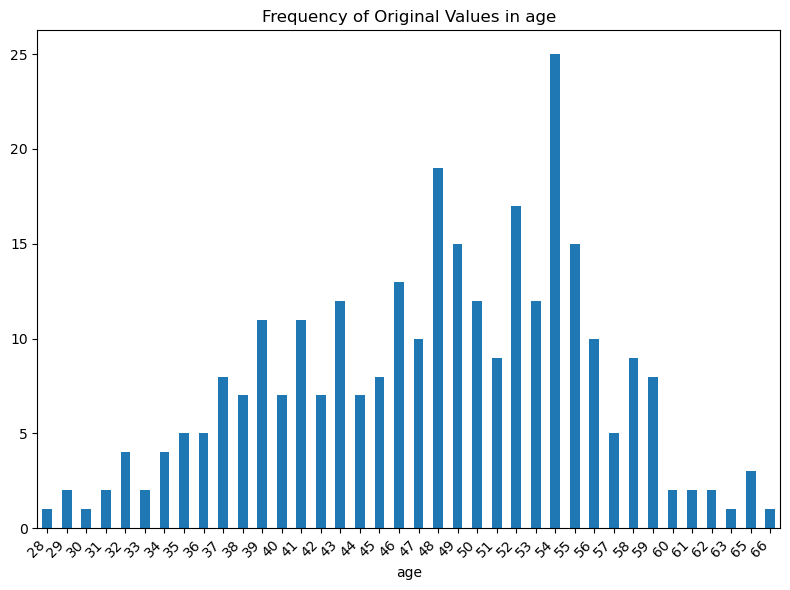

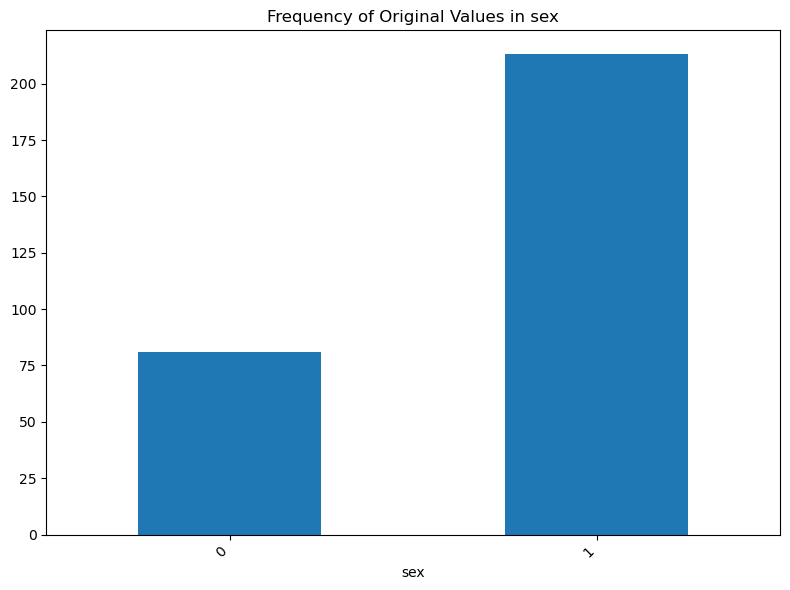

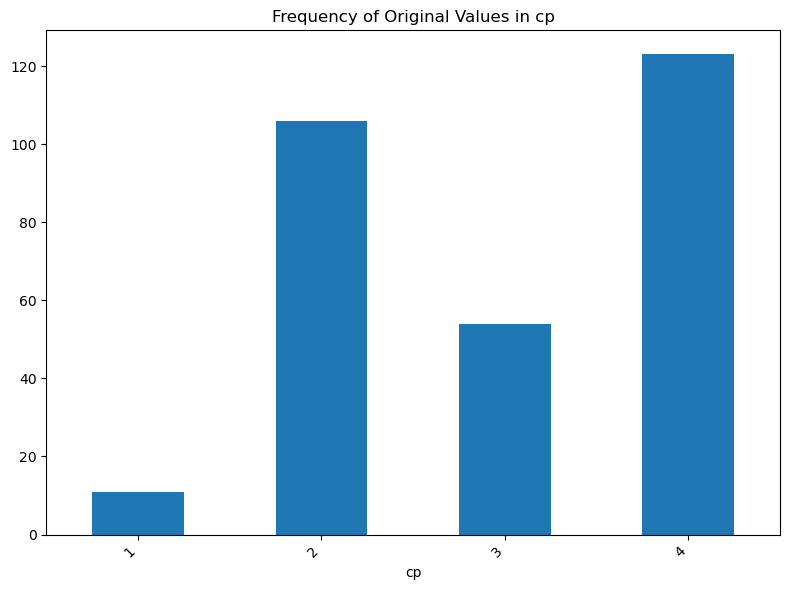

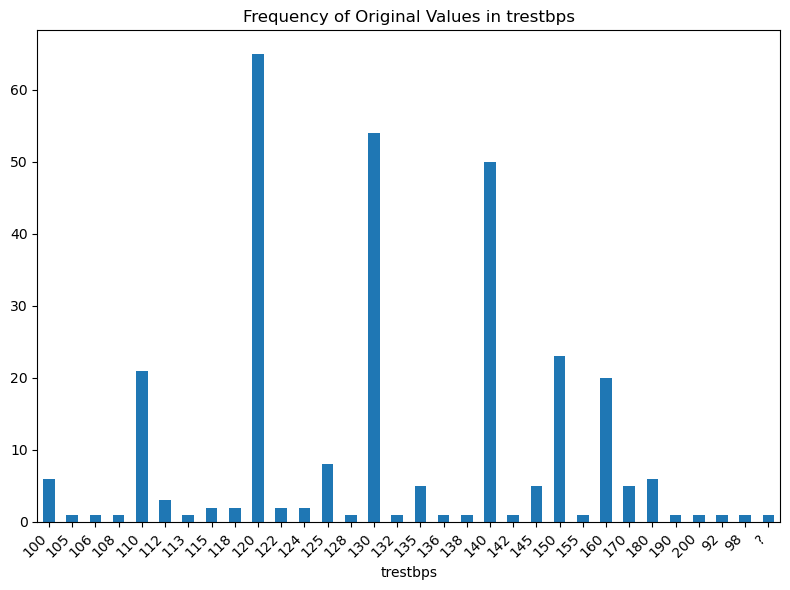

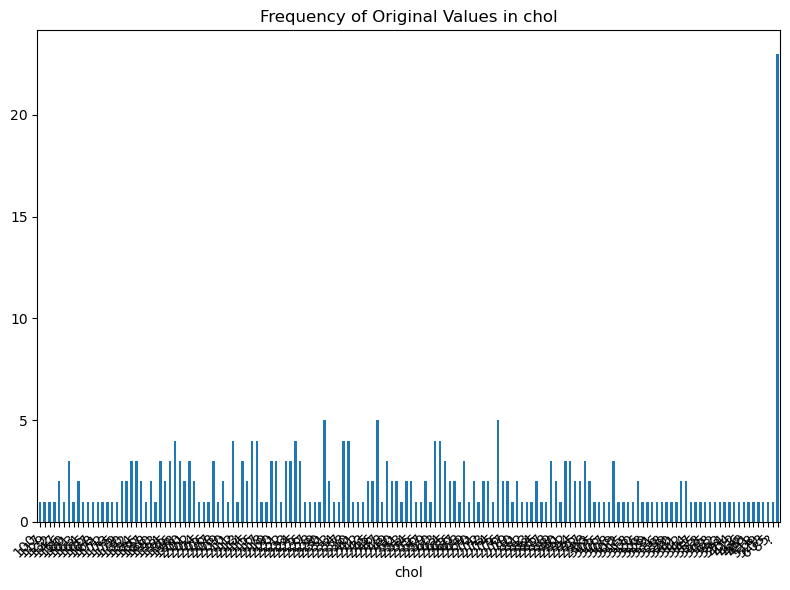

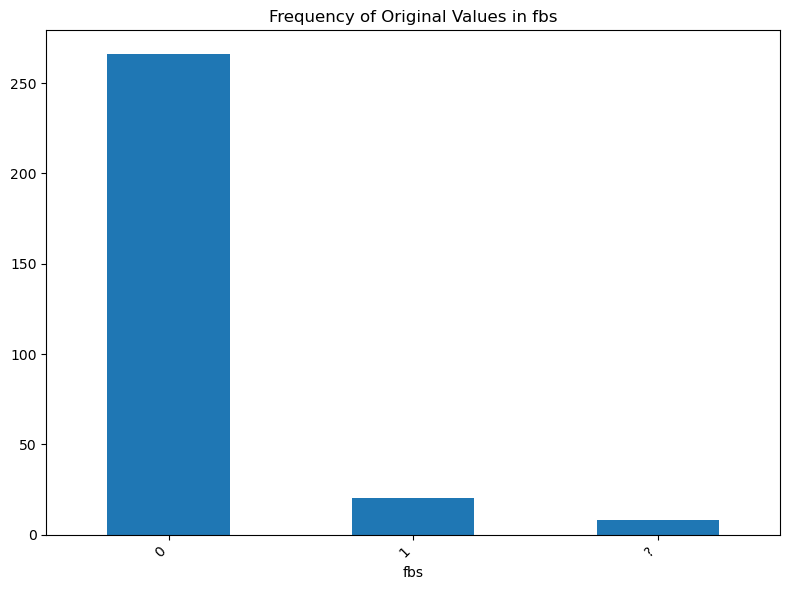

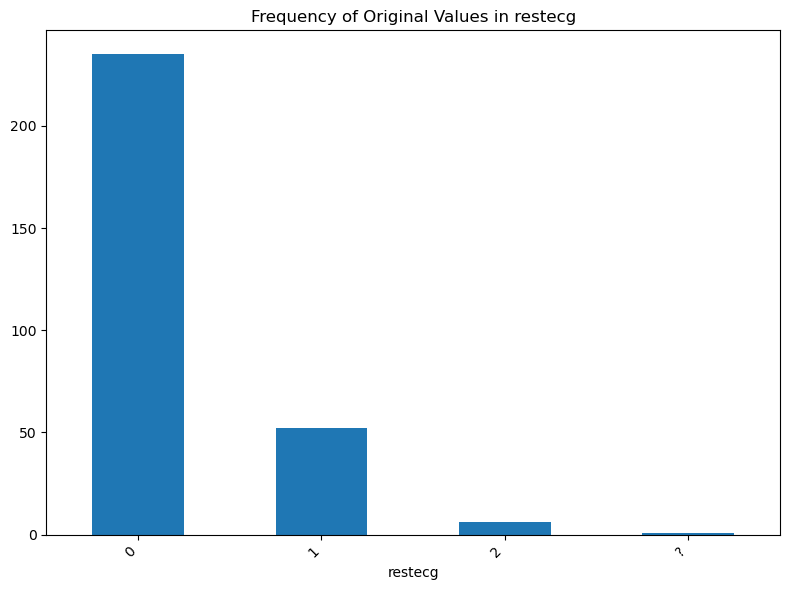

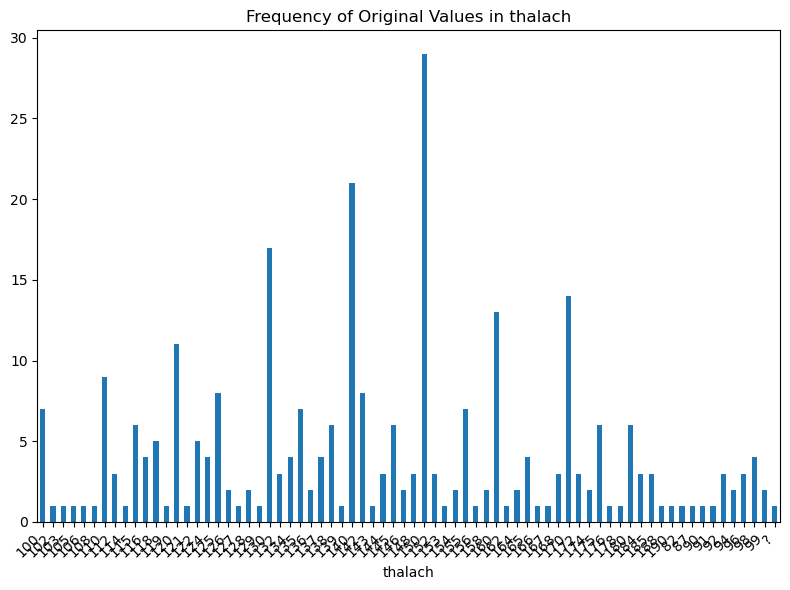

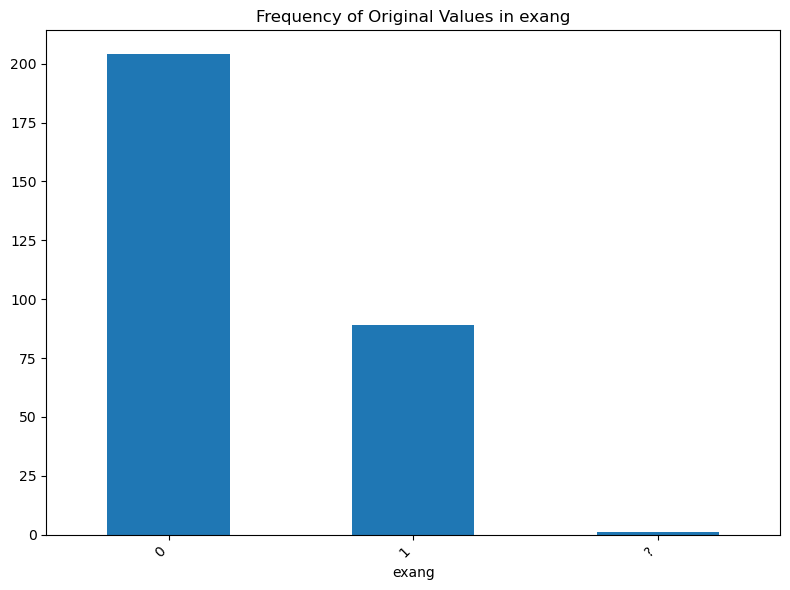

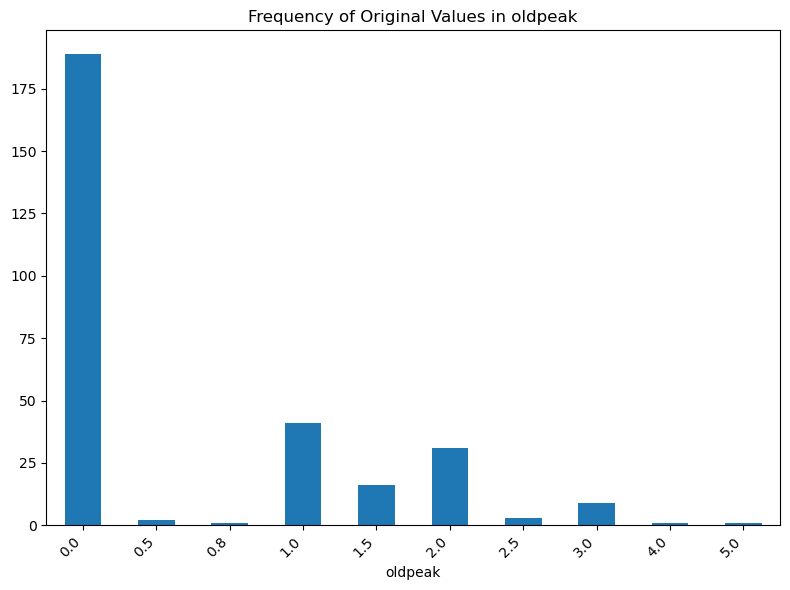

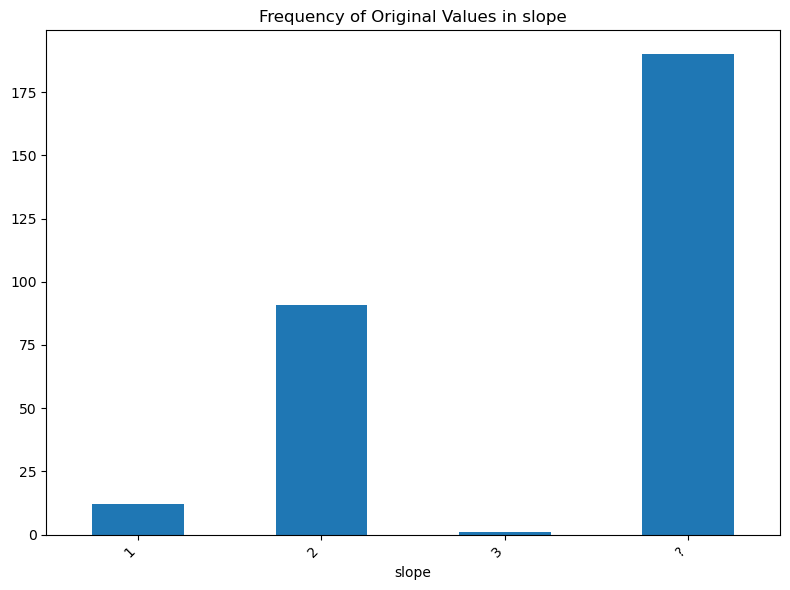

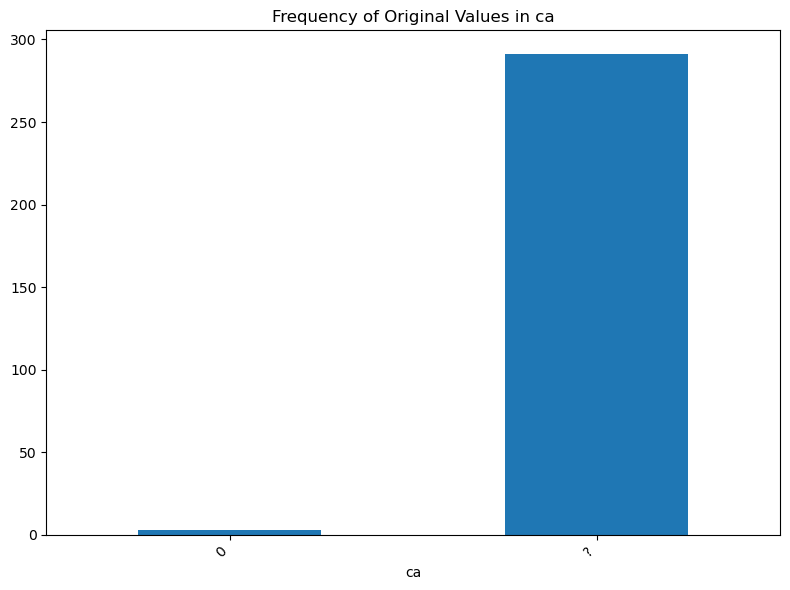

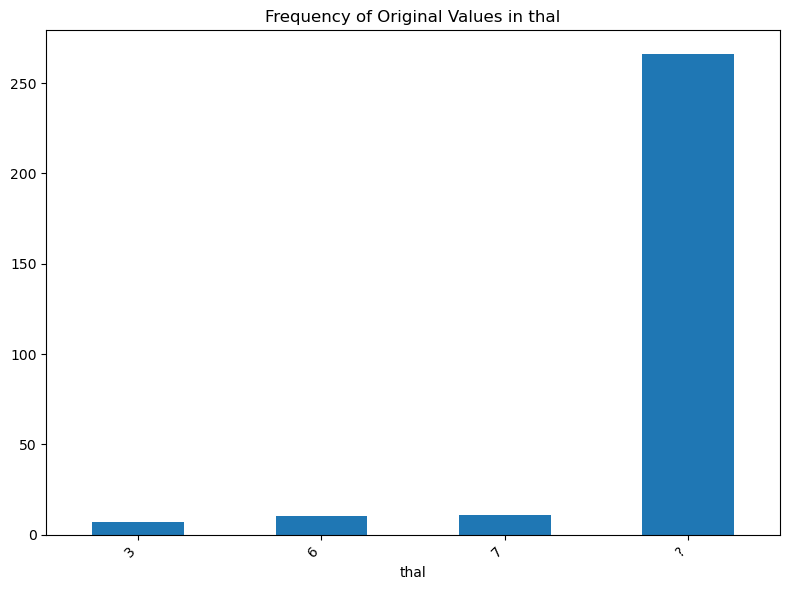

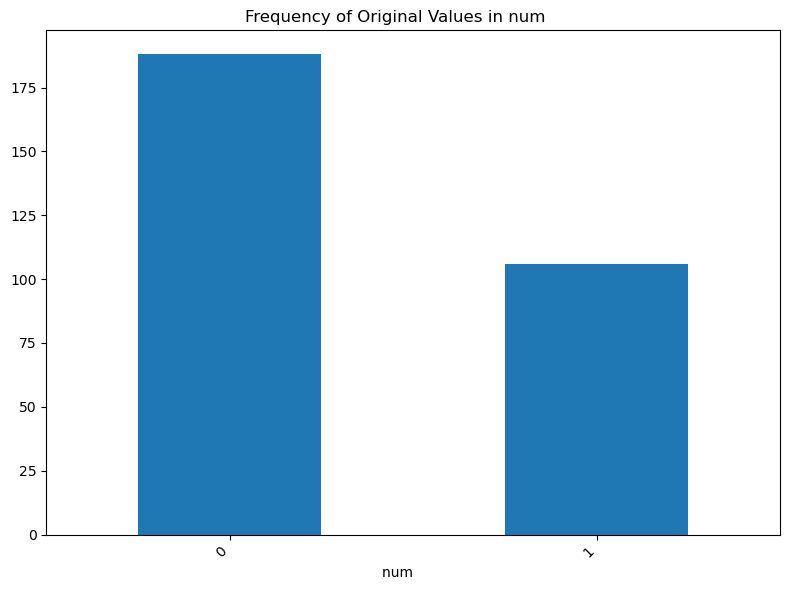

In [38]:

for col in dataset.columns:
    plt.figure(figsize=(8, 6))
    dataset[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f"Frequency of Original Values in {col}")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.show()

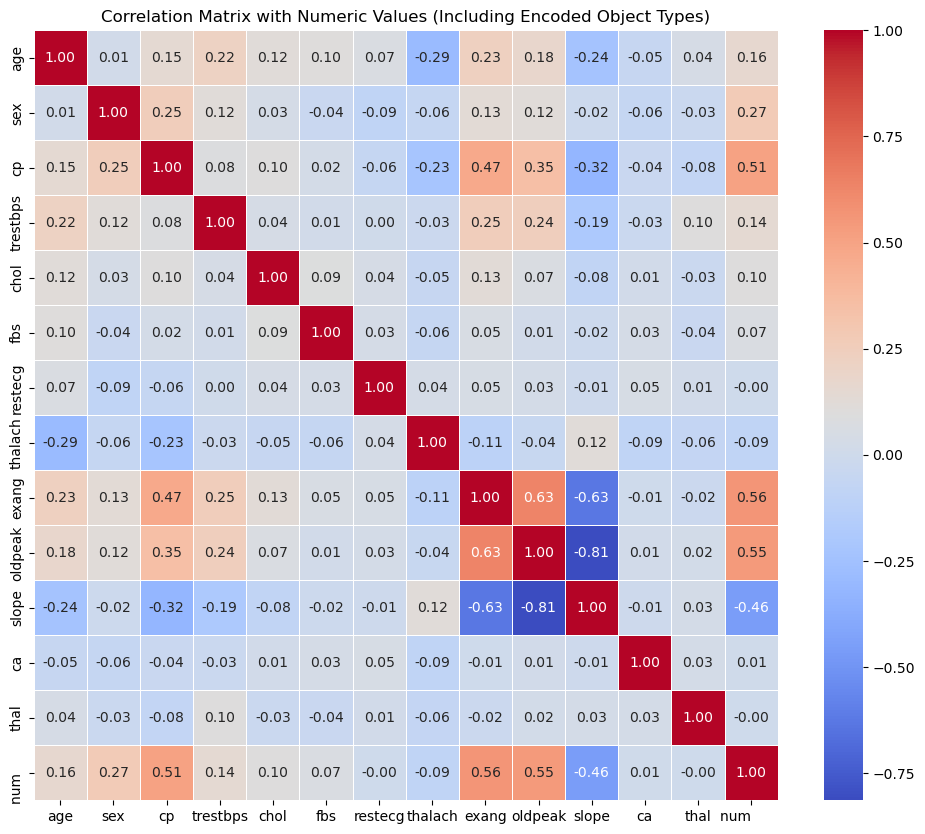

In [39]:
from sklearn.preprocessing import LabelEncoder

df_encoded = dataset.copy()
label_encoders = {}

for column in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix with Numeric Values (Including Encoded Object Types)')
plt.show()

From the First dataset we can see that there are not missing or null values. Although, there are a lot of invalid special symbols '?'. This makes the Dataset unusable, as we dont know what the '?' represents and there is a not good enough correlation between the features. In general, there is a lot of imbalance in all the classes, which would create a lot of biasand incorrect predictions. One of the main problems are the label names, which are not clear enough to understand what the values represent. 

# Parte 2

In [10]:
url = 'Exam1_df/data1.csv'
dataset = pd.read_csv(url)

In [11]:
dataset.describe(include= 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,271.000000,271.000000,271,284,281,263.000000,263,263,276.000000,294,294,294,294.000000
unique,NaN,NaN,NaN,31,149,3,NaN,68,3,NaN,4,2,4,NaN
top,NaN,NaN,NaN,120,?,0,NaN,150,0,NaN,?,?,?,NaN
freq,NaN,NaN,NaN,59,23,256,NaN,26,184,NaN,190,291,266,NaN
mean,47.826531,0.741697,3.014760,NaN,NaN,NaN,0.212928,NaN,NaN,0.609783,NaN,NaN,NaN,0.360544
std,7.811812,0.438511,0.962137,NaN,NaN,NaN,0.454309,NaN,NaN,0.922967,NaN,NaN,NaN,0.480977
min,28.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,42.000000,0.000000,2.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,49.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
75%,54.000000,1.000000,4.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000


In [12]:
dataset.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         271 non-null    float64
 2   cp          271 non-null    float64
 3   trestbps    271 non-null    object 
 4   chol        284 non-null    object 
 5   fbs         281 non-null    object 
 6   restecg     263 non-null    float64
 7   thalach     263 non-null    object 
 8   exang       263 non-null    object 
 9   oldpeak     276 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 32.3+ KB


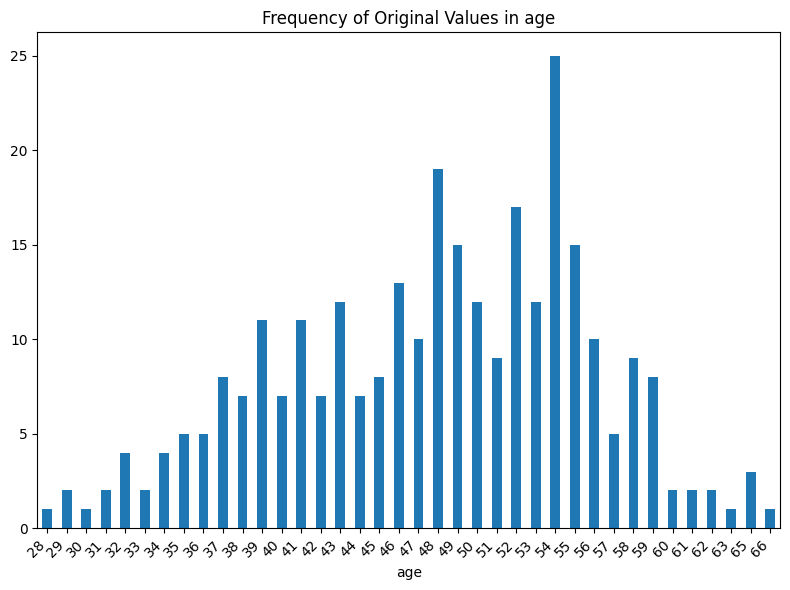

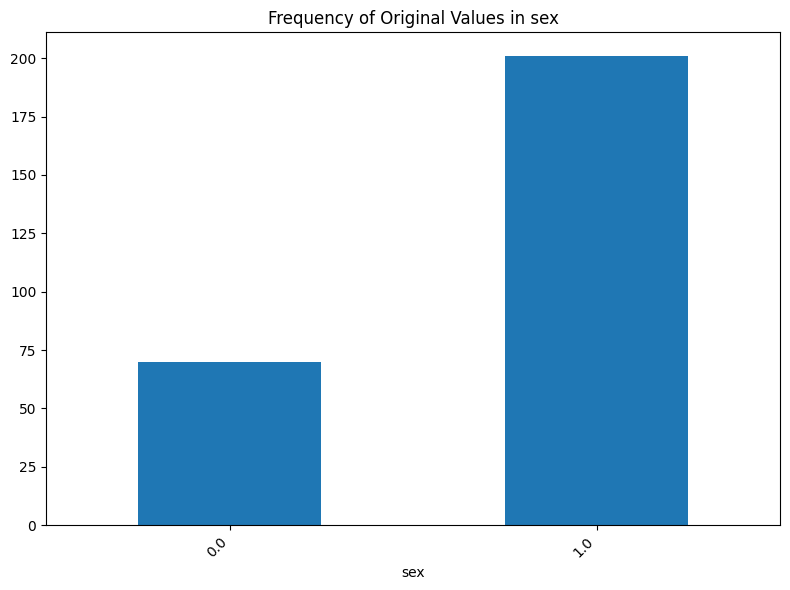

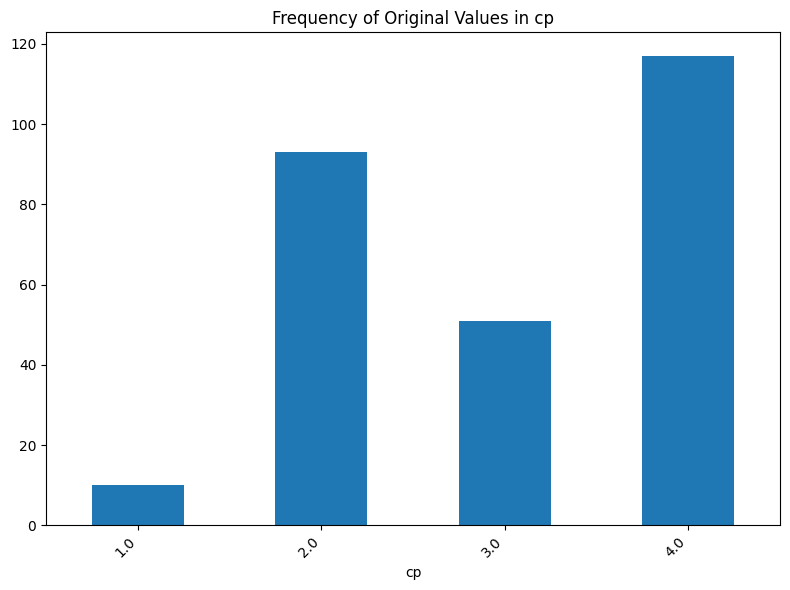

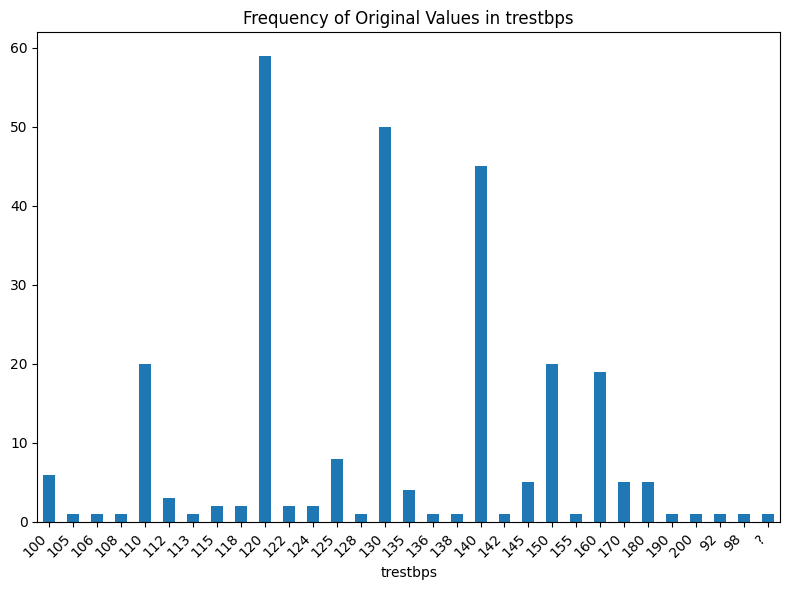

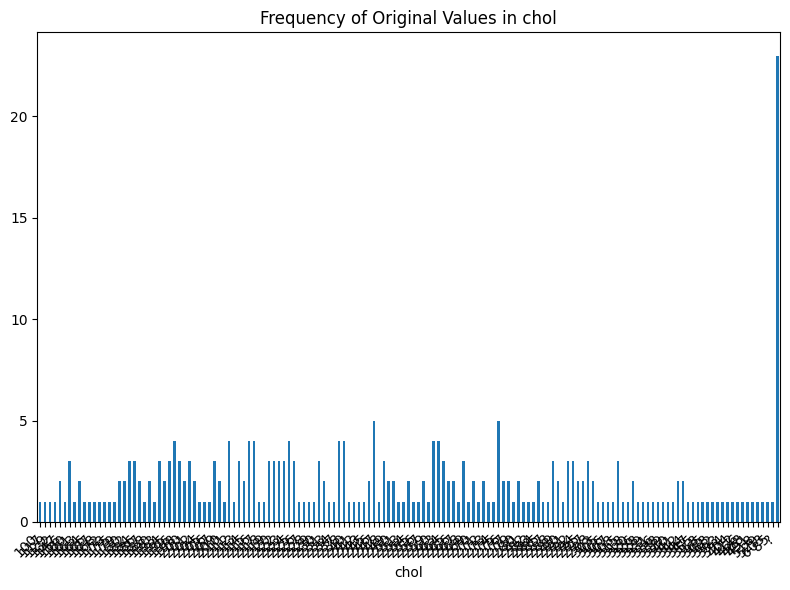

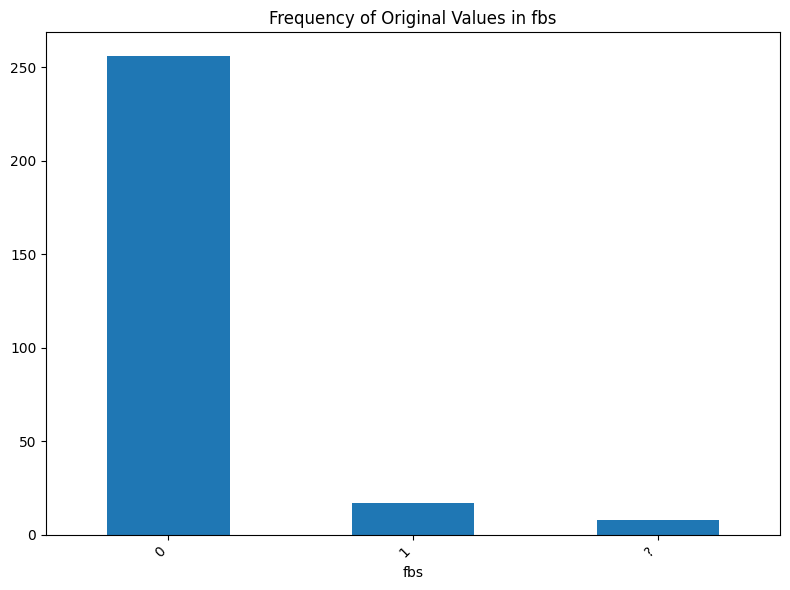

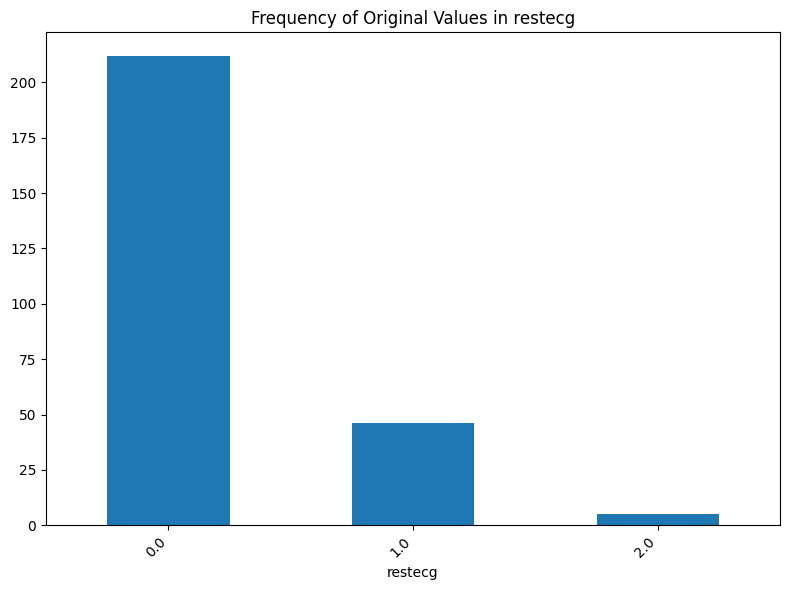

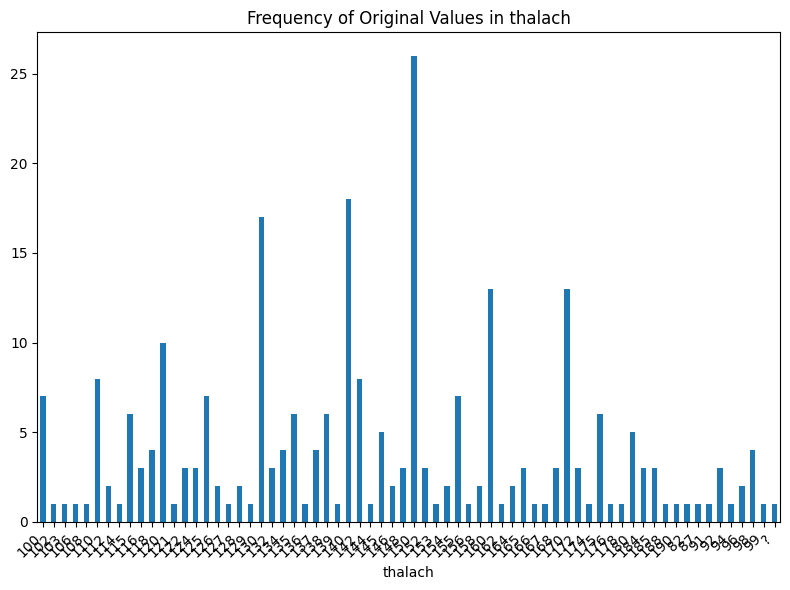

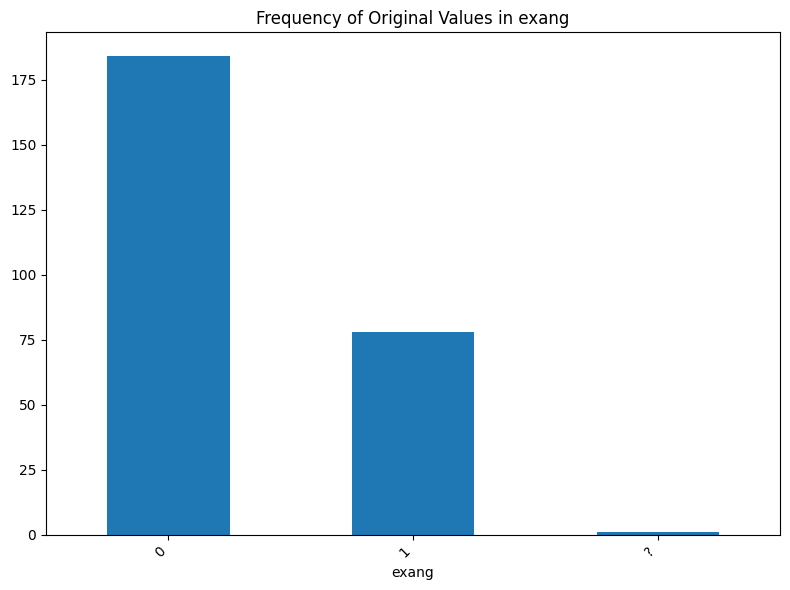

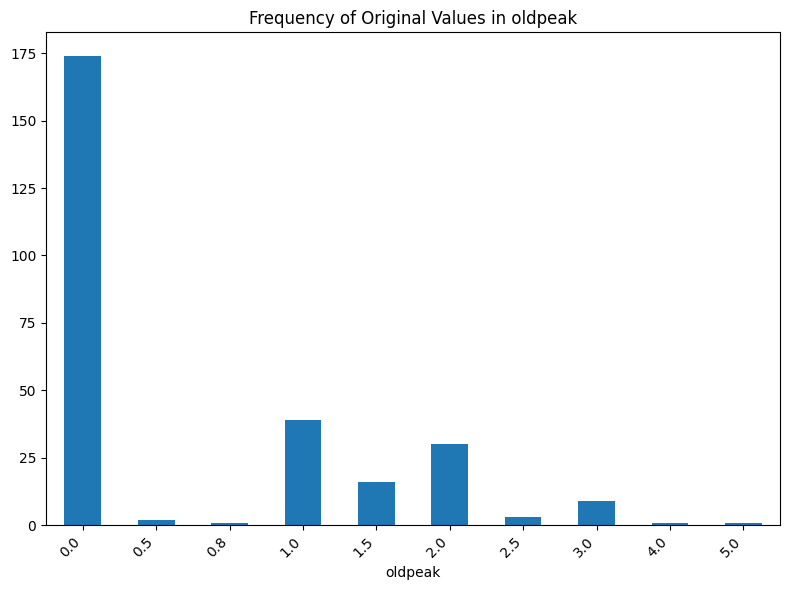

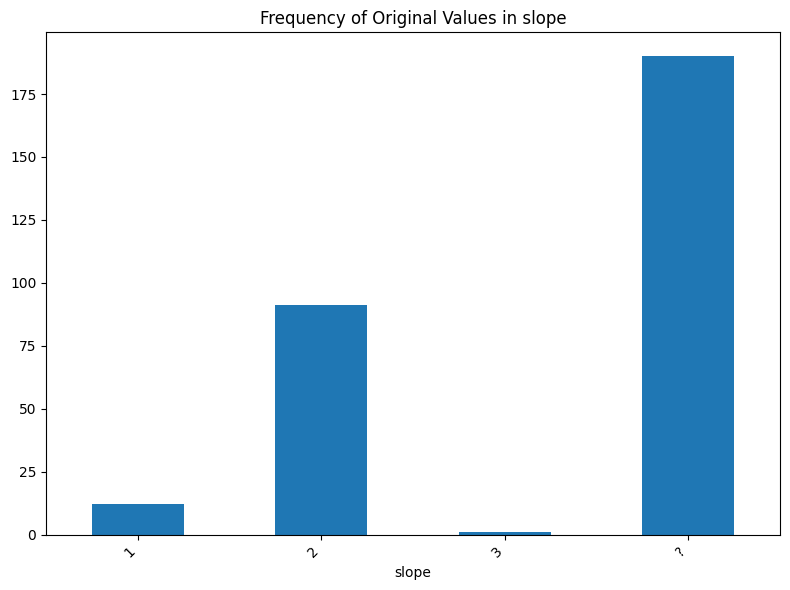

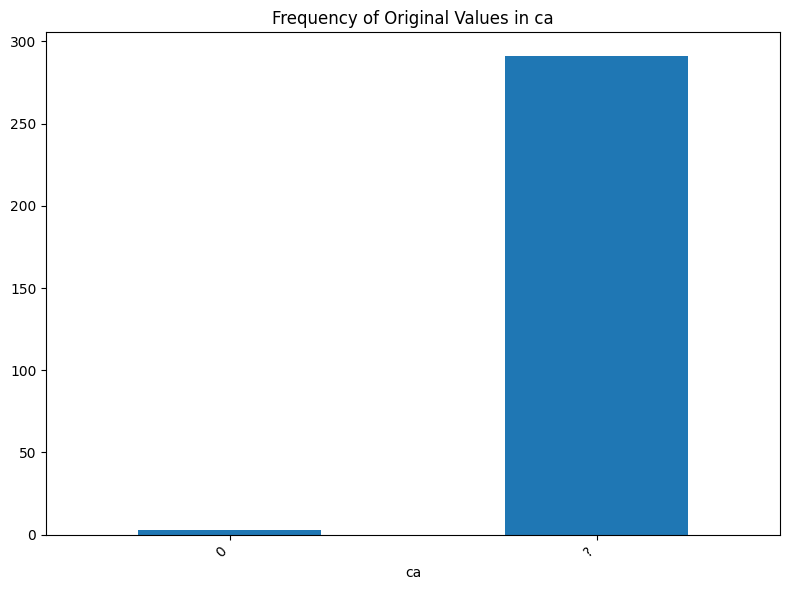

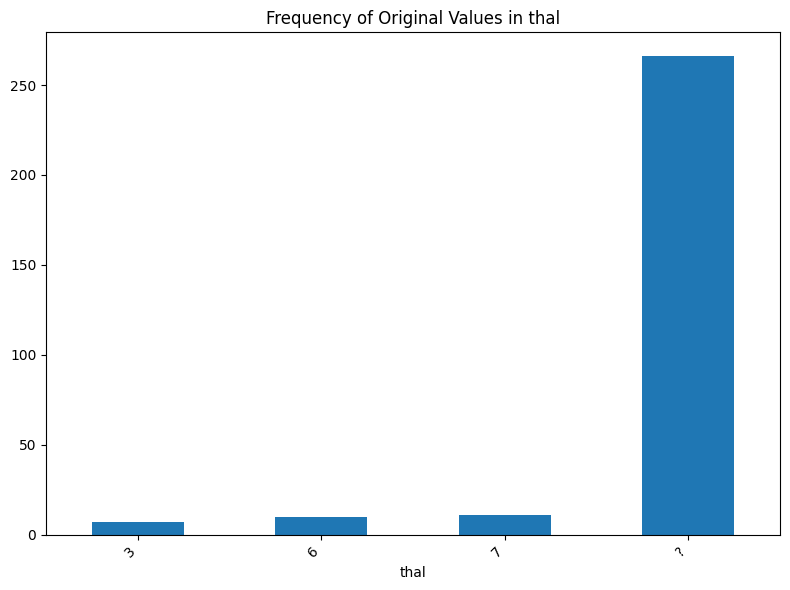

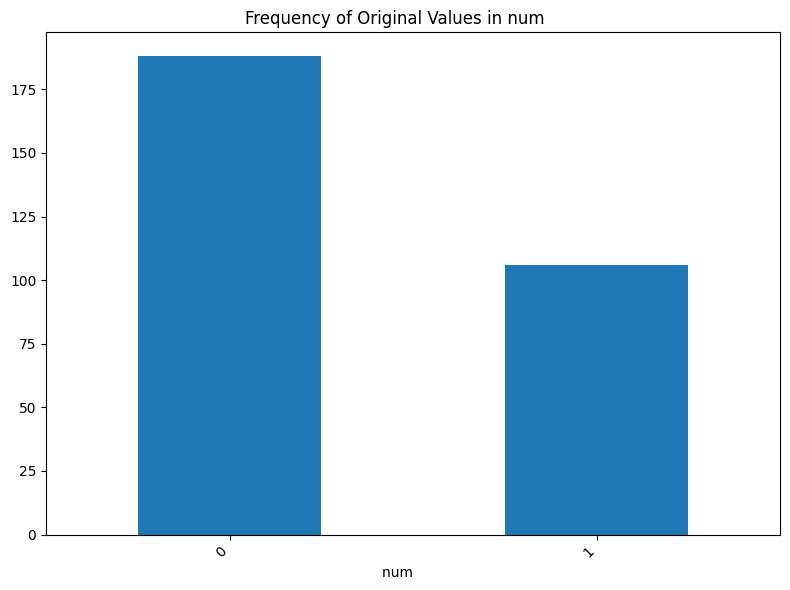

In [13]:

for col in dataset.columns:
    plt.figure(figsize=(8, 6))
    dataset[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f"Frequency of Original Values in {col}")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.show()

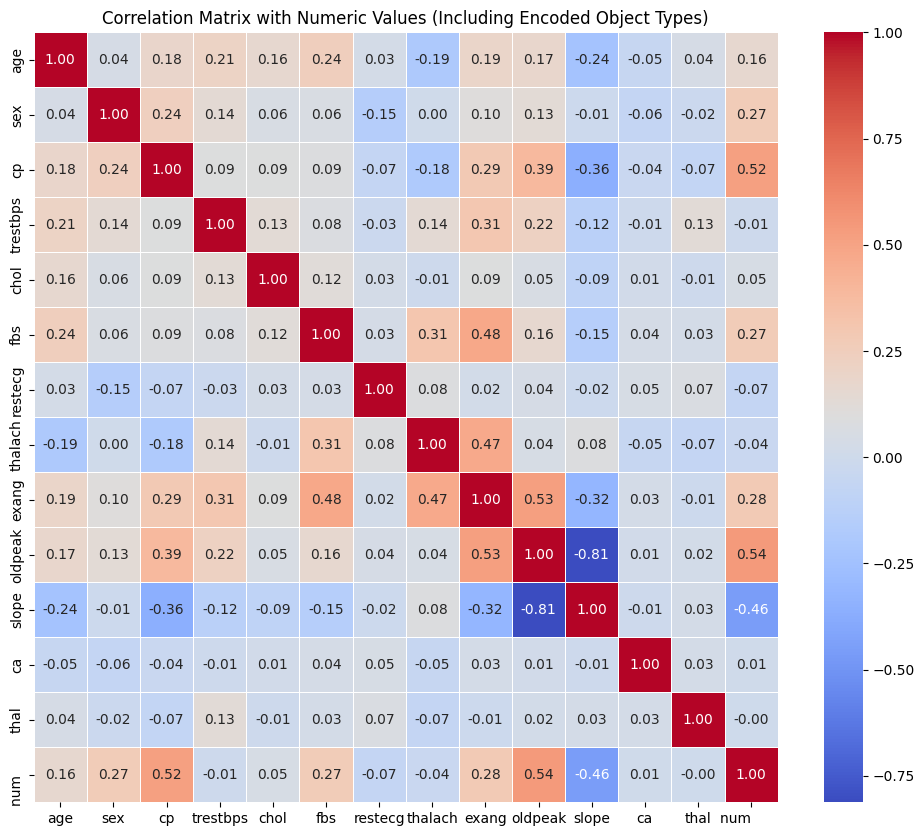

In [14]:
from sklearn.preprocessing import LabelEncoder

df_encoded = dataset.copy()
label_encoders = {}

for column in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix with Numeric Values (Including Encoded Object Types)')
plt.show()

From this dataset we can see that there are a lot of missingvalues. Although, there are a lot of invalid special symbols '?'. This makes the Dataset unusable, as we dont know what the '?' represents and there is a not good enough correlation between the features. In general, there is a lot of imbalance in all the classes, which would create a lot of biasand incorrect predictions. One of the main problems are the label names, which are not clear enough to understand what the values represent. 

# Parte 3

In [15]:
url = 'Exam1_df/data2.csv'
dataset = pd.read_csv(url)

In [16]:
dataset.describe(include= 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.0,294.000000,294.000000
mean,47.826531,3402.085034,71.003401,213.425170,357.431973,0.078231,0.224490,196.326531,0.302721,0.586054,146.500000,0.0,-81.900000,0.360544
std,7.811812,58321.141956,1166.249918,977.285035,1823.852372,0.268993,0.471667,983.635506,0.460219,0.908648,85.014705,0.0,51.009064,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.0,-169.800000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,73.250000,0.0,-125.850000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,241.500000,0.000000,0.000000,140.000000,0.000000,0.000000,146.500000,0.0,-81.900000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,281.000000,0.000000,0.000000,155.000000,1.000000,1.000000,219.750000,0.0,-37.950000,1.000000
max,66.000000,1000000.000000,20000.000000,12000.000000,31500.000000,1.000000,2.000000,17000.000000,1.000000,5.000000,293.000000,0.0,6.000000,1.000000


In [17]:
dataset.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    int64  
 4   chol        294 non-null    int64  
 5   fbs         294 non-null    int64  
 6   restecg     294 non-null    int64  
 7   thalach     294 non-null    int64  
 8   exang       294 non-null    int64  
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    int64  
 11  ca          294 non-null    int64  
 12  thal        294 non-null    float64
 13  num         294 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 32.3 KB


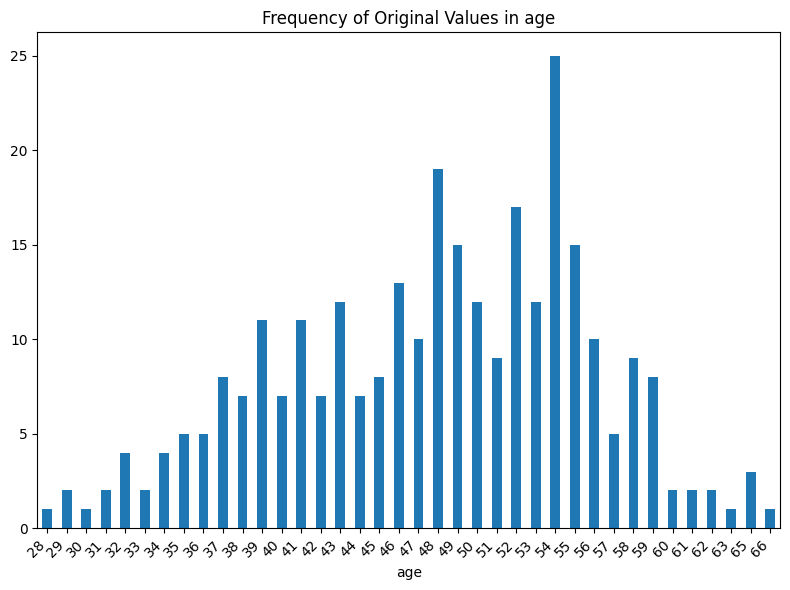

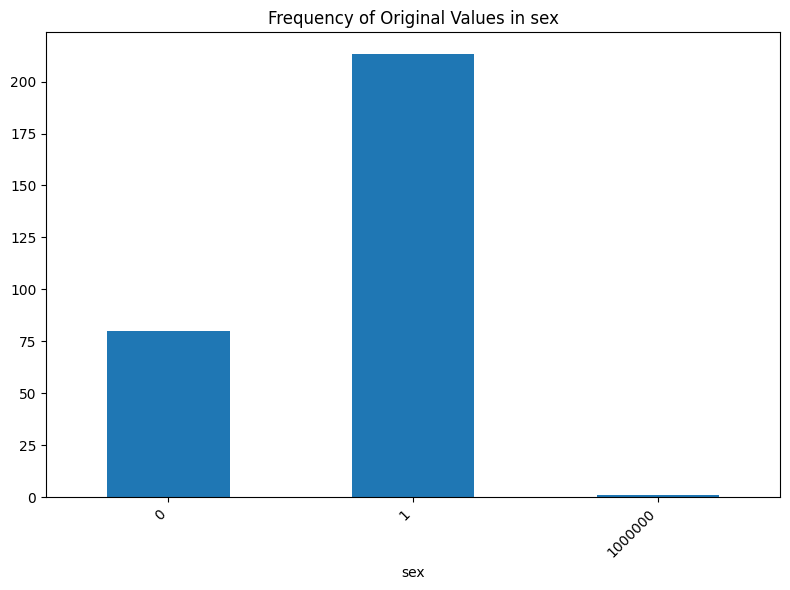

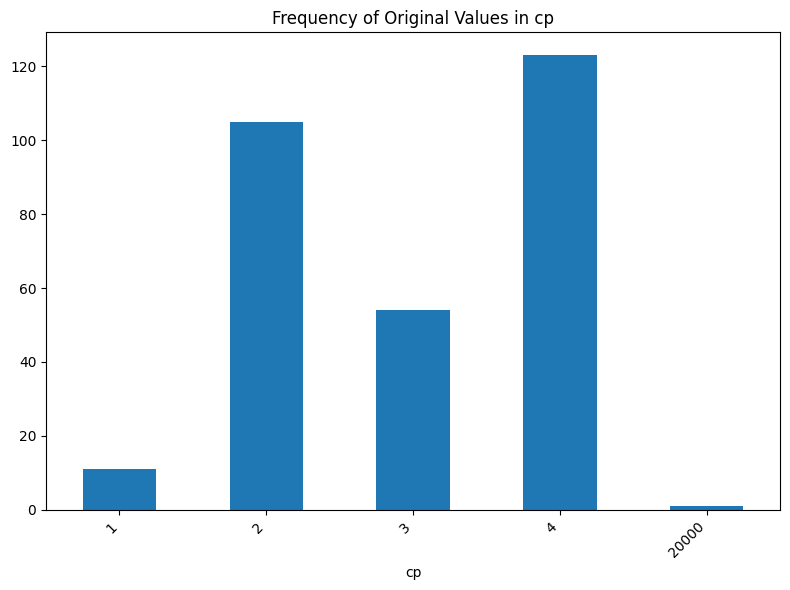

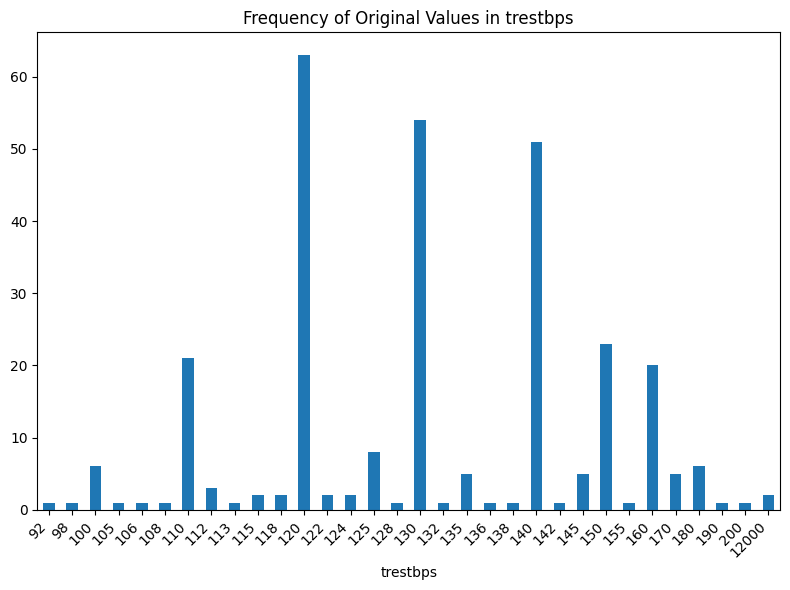

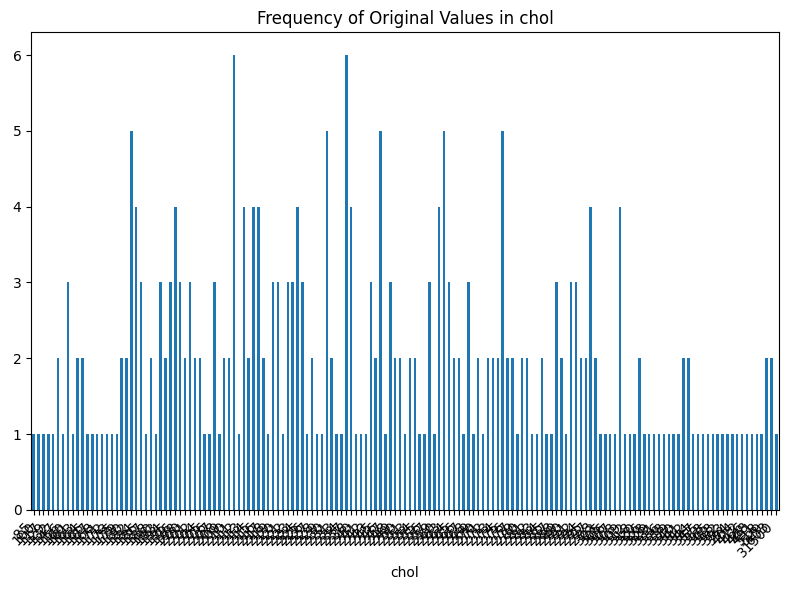

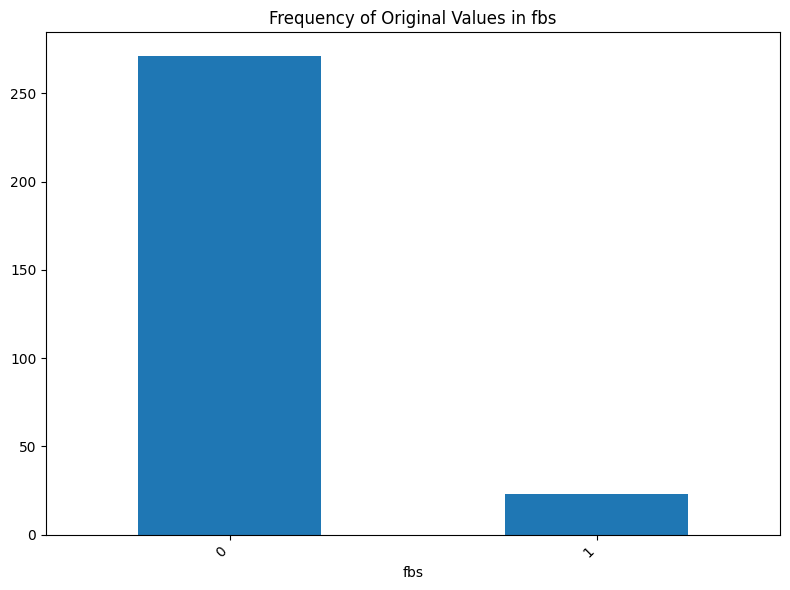

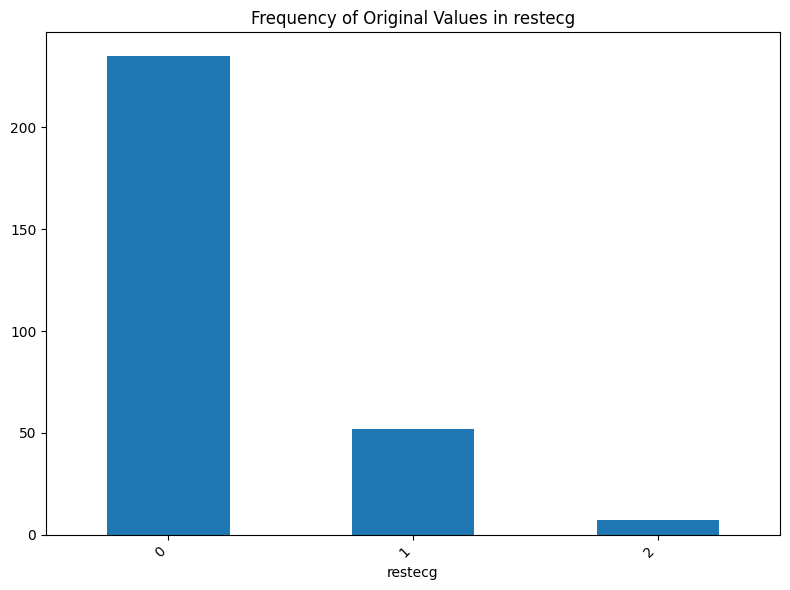

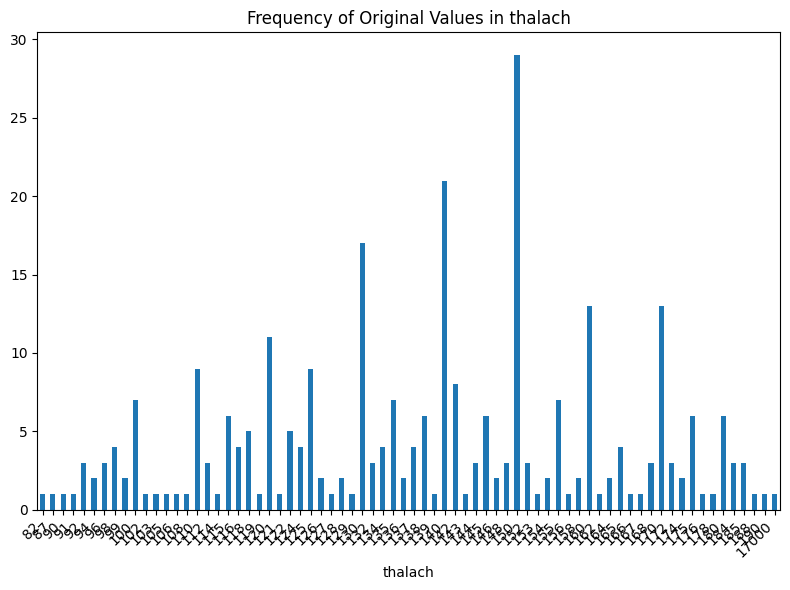

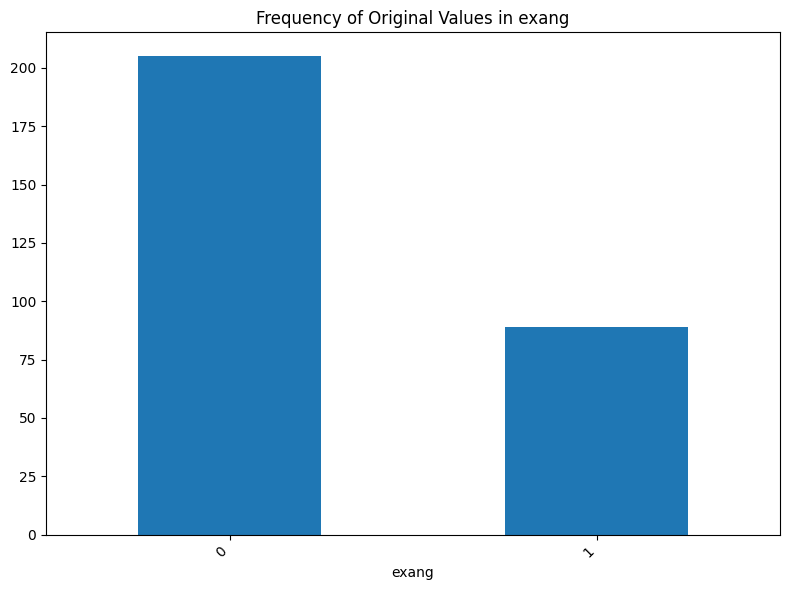

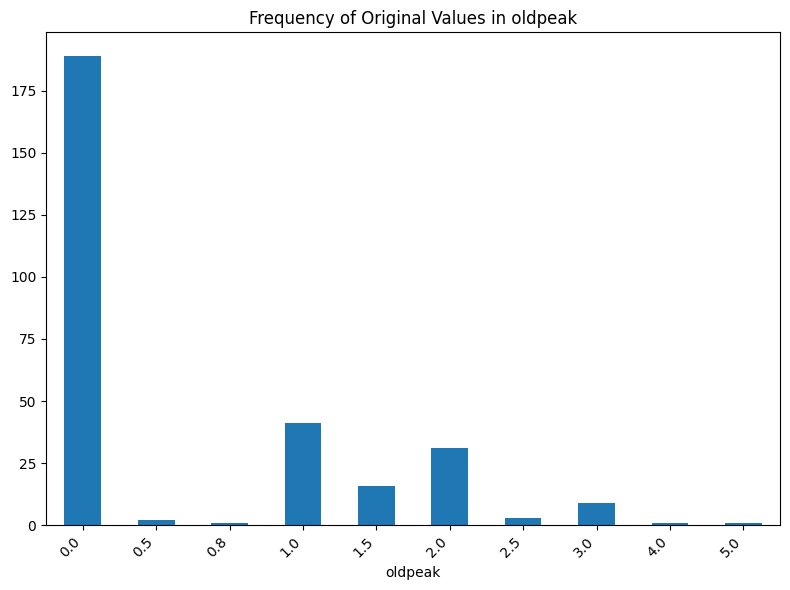

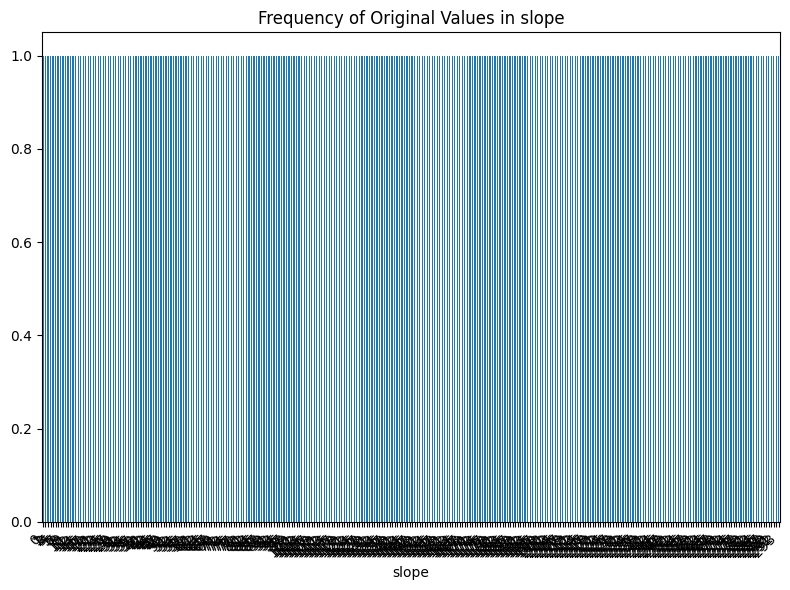

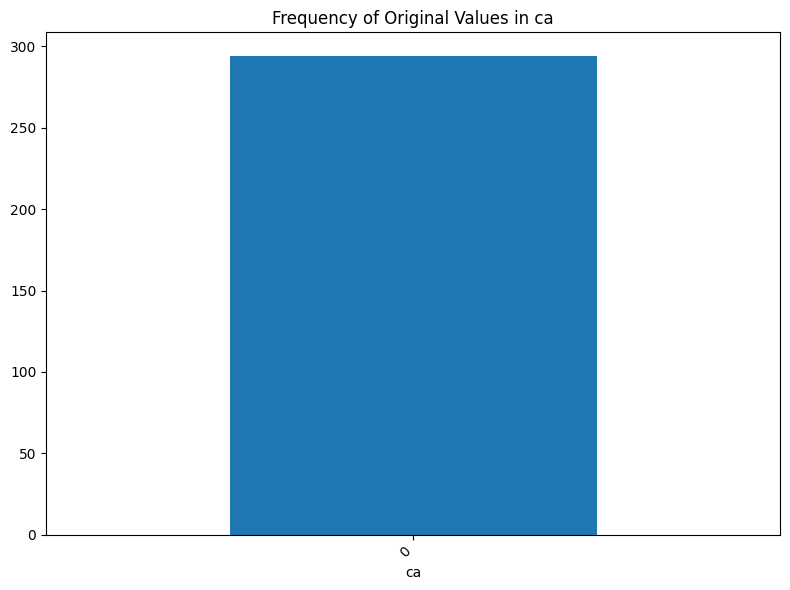

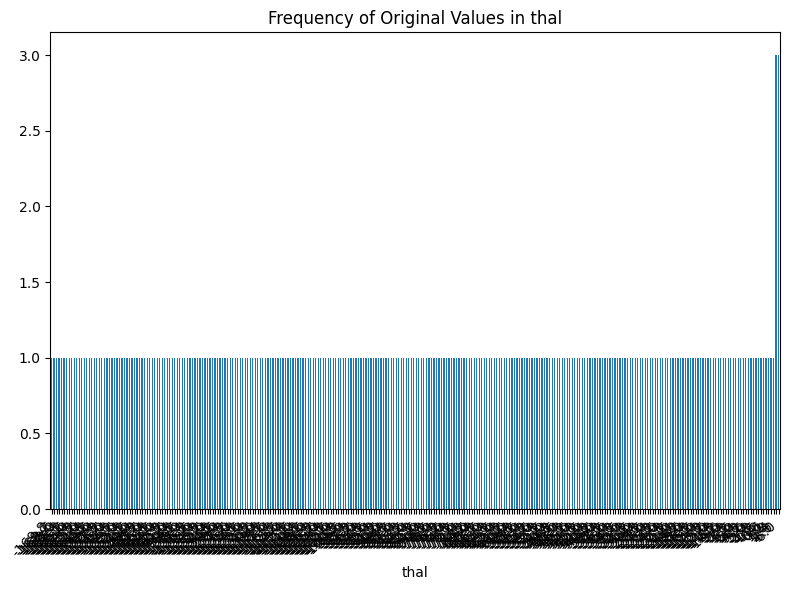

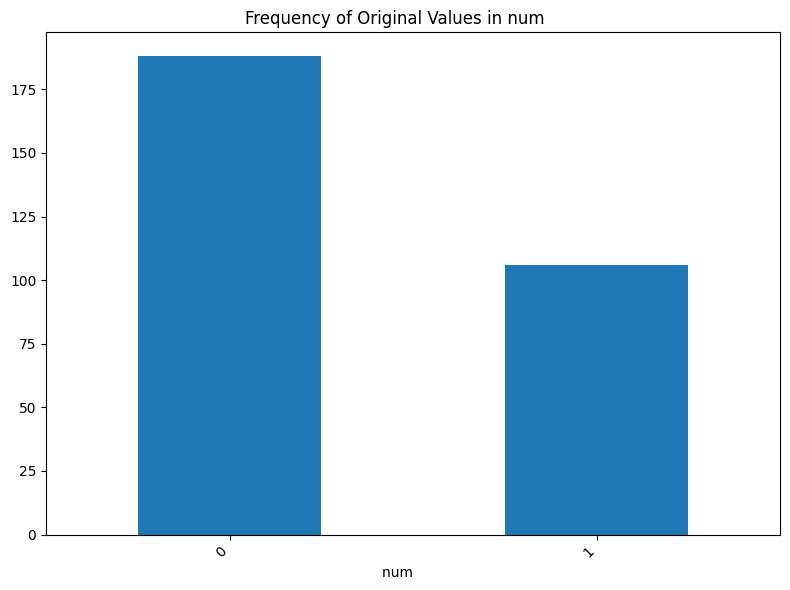

In [18]:

for col in dataset.columns:
    plt.figure(figsize=(8, 6))
    dataset[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f"Frequency of Original Values in {col}")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.show()

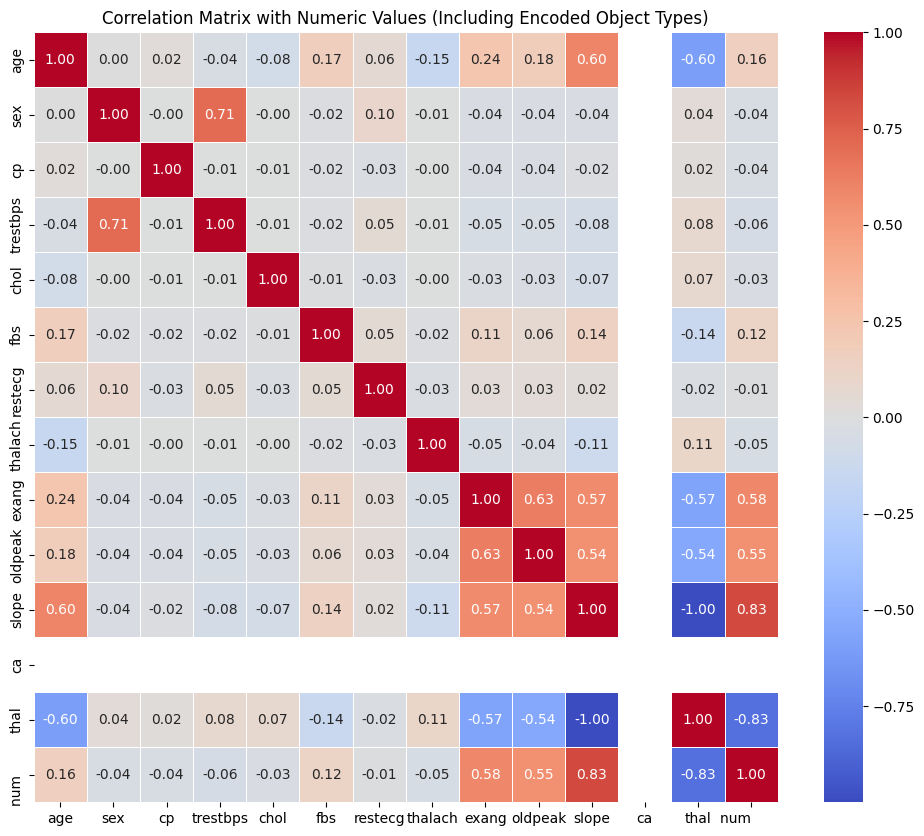

In [19]:
from sklearn.preprocessing import LabelEncoder

df_encoded = dataset.copy()
label_encoders = {}

for column in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix with Numeric Values (Including Encoded Object Types)')
plt.show()

From this dataset we can see that there are not missing or null values. Although, there is an entire feature with 0. And an entire feature with 1. This makes the Dataset difficult to use , because it is possible to drop the feature and use the rest of the dataset. In general, the classes seem a little bit more balanced, althoug there is an overlayer in thal, which should be removed or scaled. The same problem persists, as one of the main problems are the label names, which are not clear enough to understand what the values represent. 

# Parte 4

In [20]:
url = 'Exam1_df/data3.csv'
dataset = pd.read_csv(url)

In [21]:
dataset.describe(include= 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.0,294.000000,294.000000
mean,47.826531,0.727891,2.982993,132.608844,251.360544,0.078231,0.224490,139.081633,0.302721,0.586054,146.500000,0.0,-81.900000,0.360544
std,7.811812,0.445804,0.965117,17.601778,71.086156,0.268993,0.471667,23.563873,0.460219,0.908648,85.014705,0.0,51.009064,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.0,-169.800000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,73.250000,0.0,-125.850000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,241.500000,0.000000,0.000000,140.000000,0.000000,0.000000,146.500000,0.0,-81.900000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,281.000000,0.000000,0.000000,155.000000,1.000000,1.000000,219.750000,0.0,-37.950000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,293.000000,0.0,6.000000,1.000000


In [ ]:
dataset.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    int64  
 4   chol        294 non-null    int64  
 5   fbs         294 non-null    int64  
 6   restecg     294 non-null    int64  
 7   thalach     294 non-null    int64  
 8   exang       294 non-null    int64  
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    int64  
 11  ca          294 non-null    int64  
 12  thal        294 non-null    float64
 13  num         294 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 32.3 KB


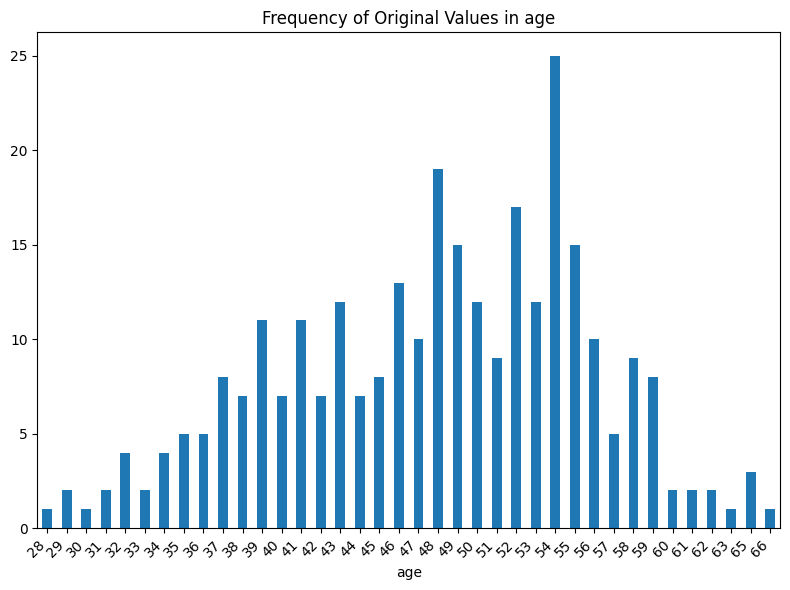

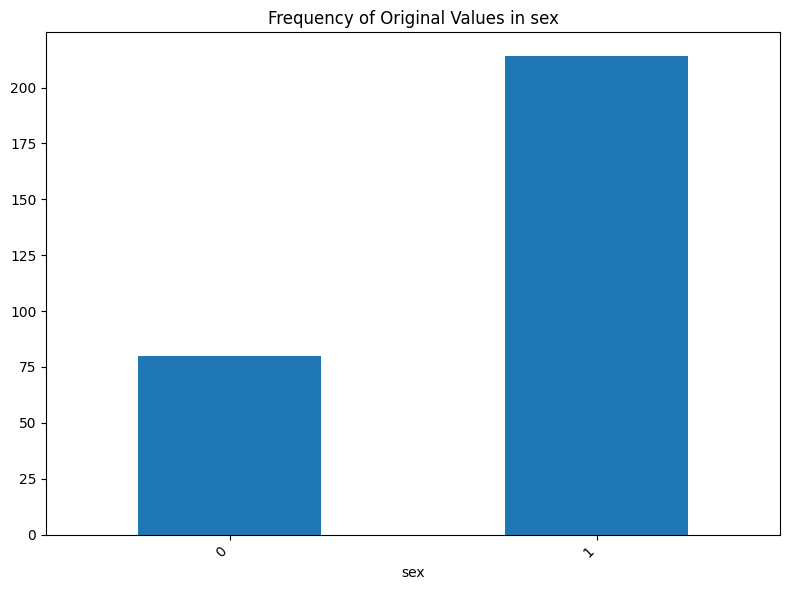

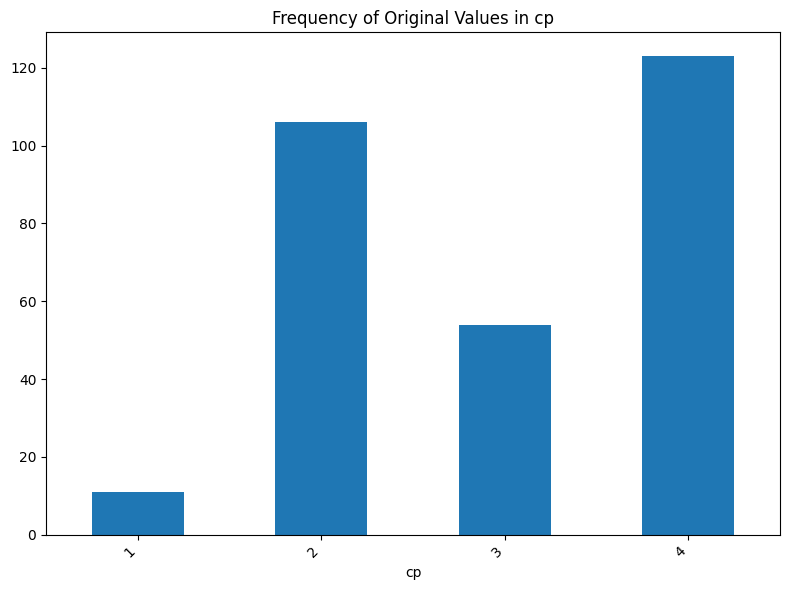

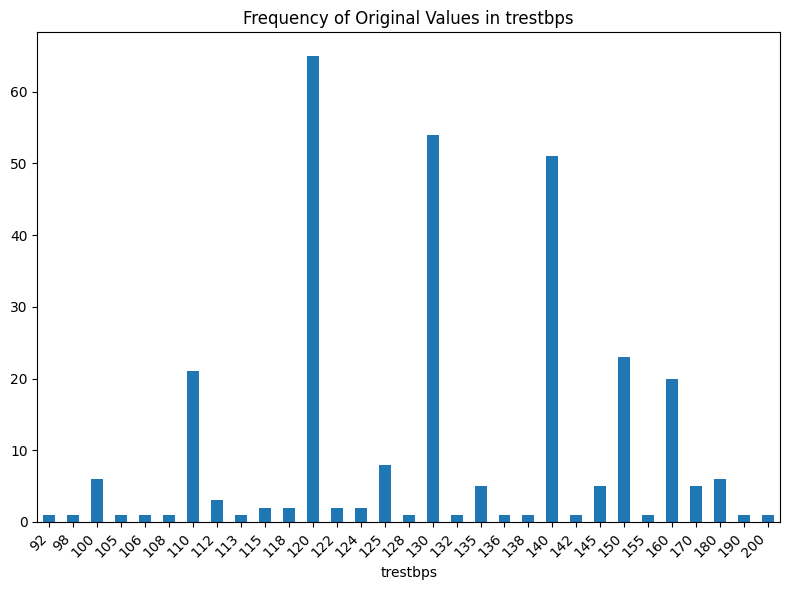

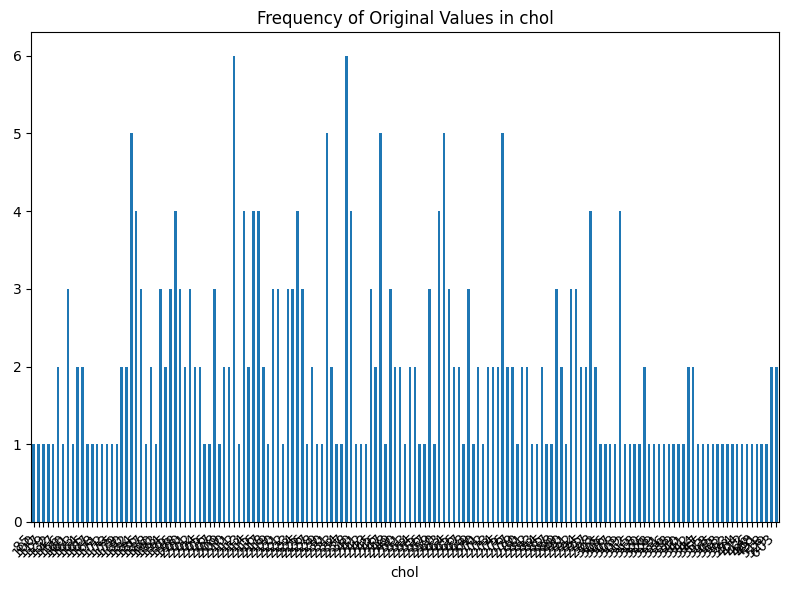

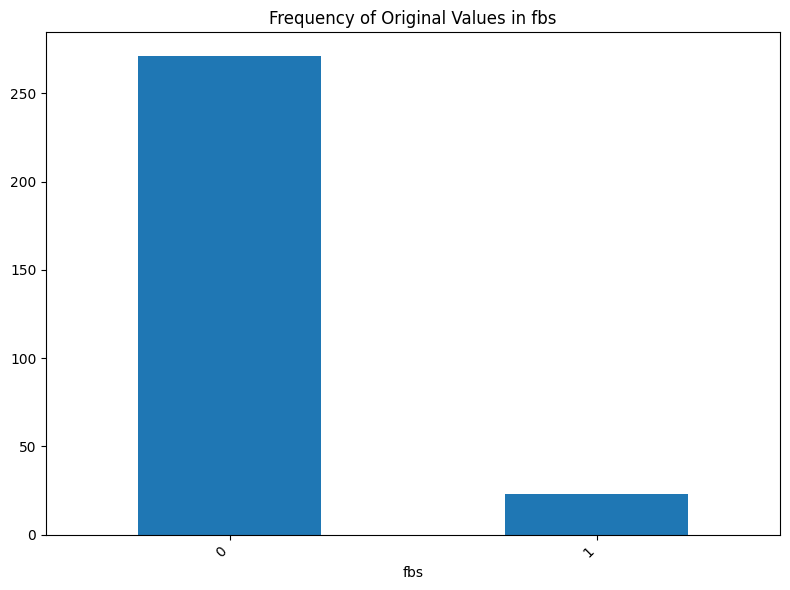

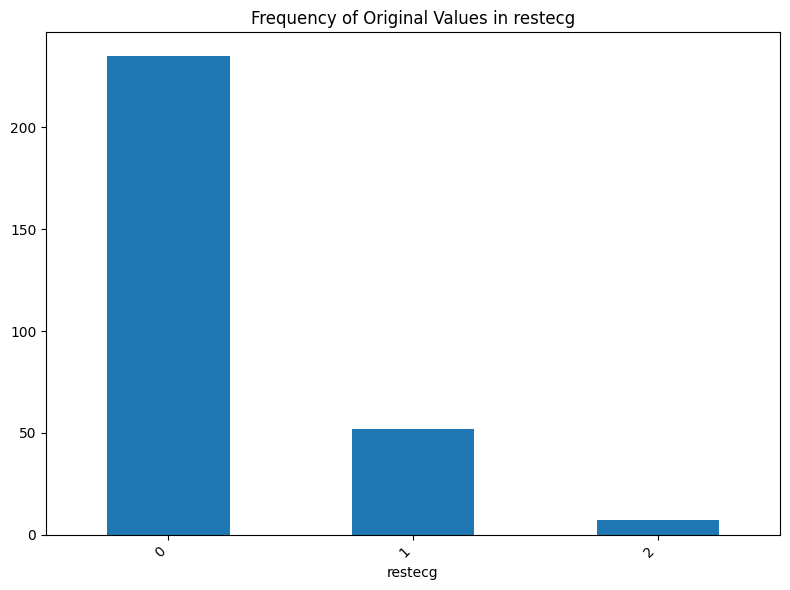

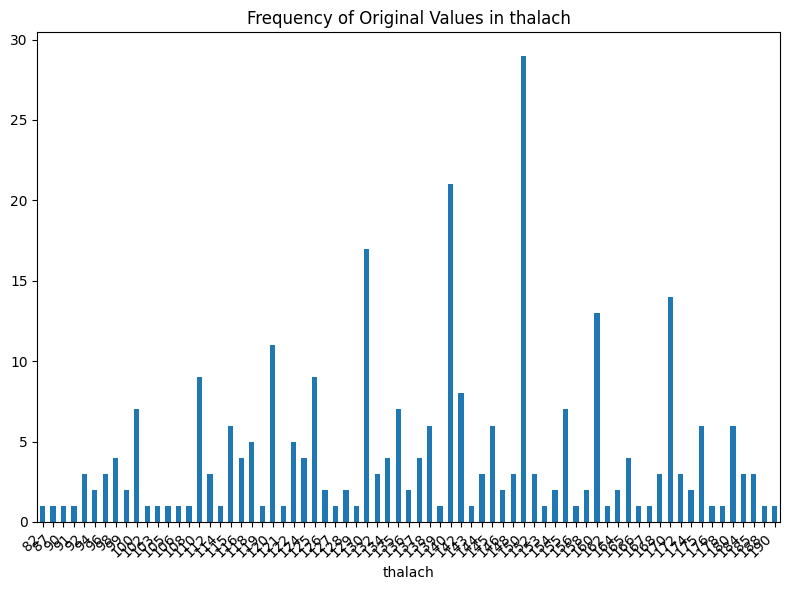

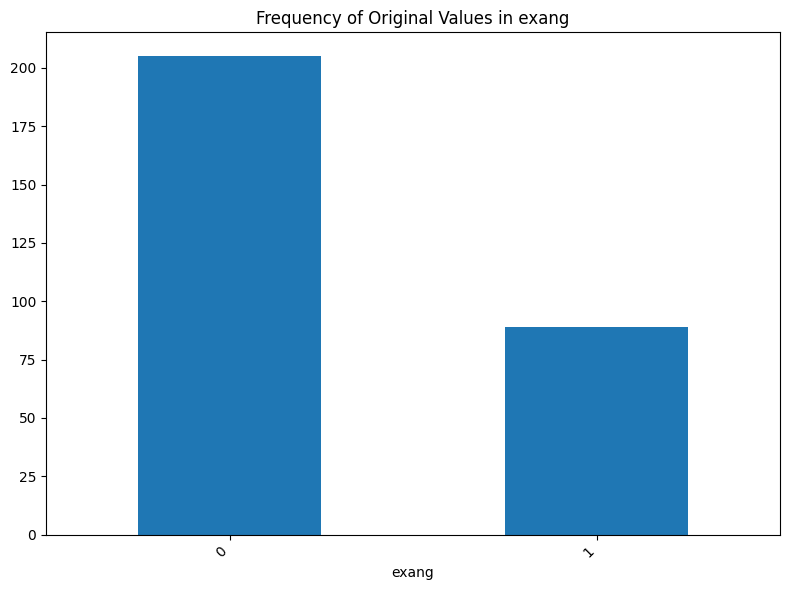

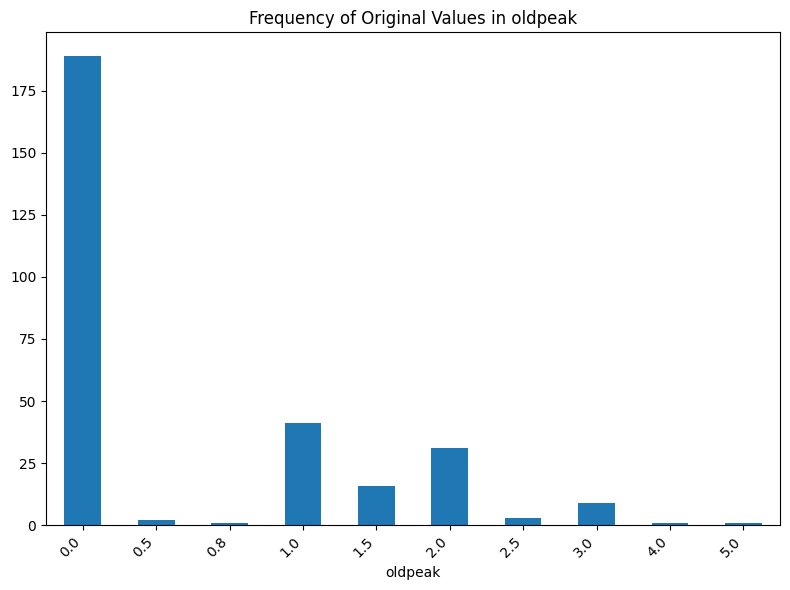

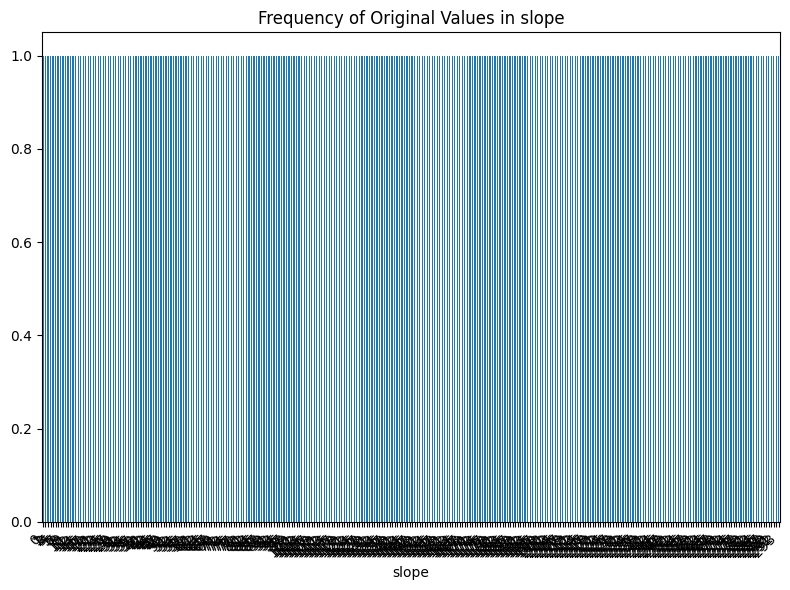

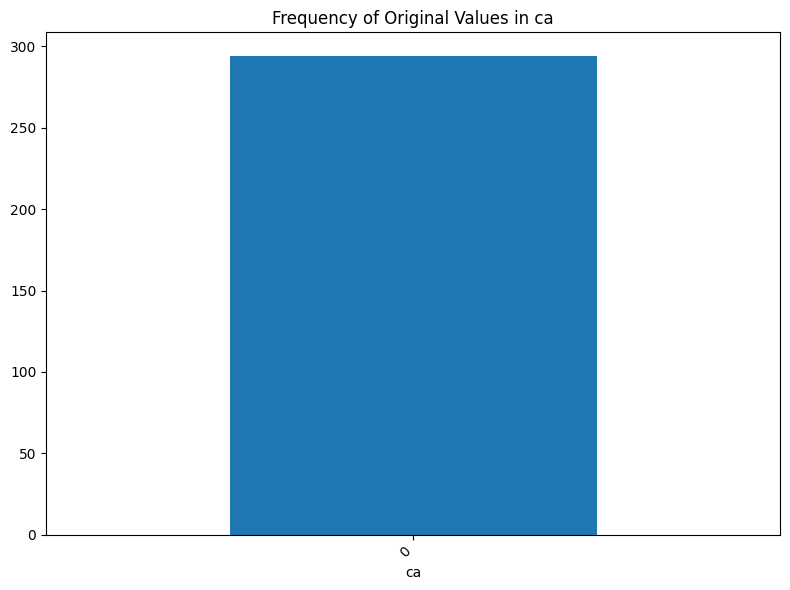

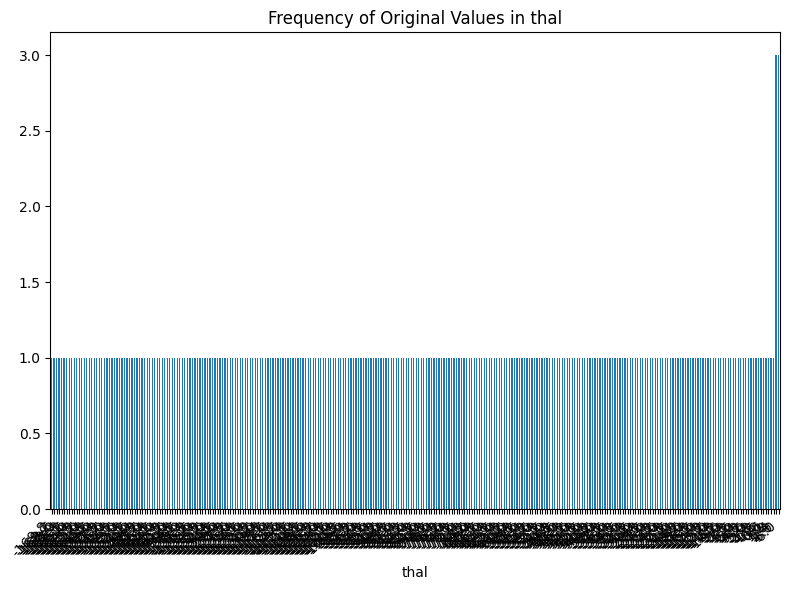

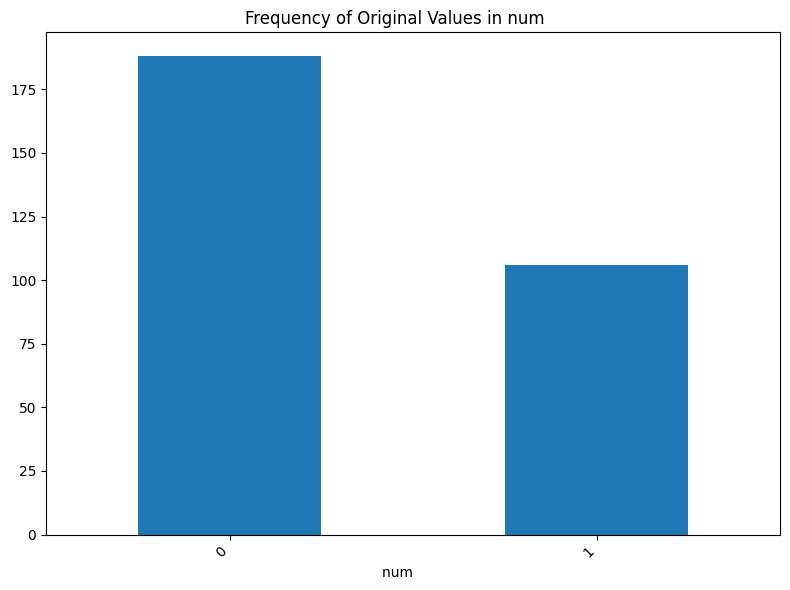

In [25]:

for col in dataset.columns:
    plt.figure(figsize=(8, 6))
    dataset[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f"Frequency of Original Values in {col}")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.show()

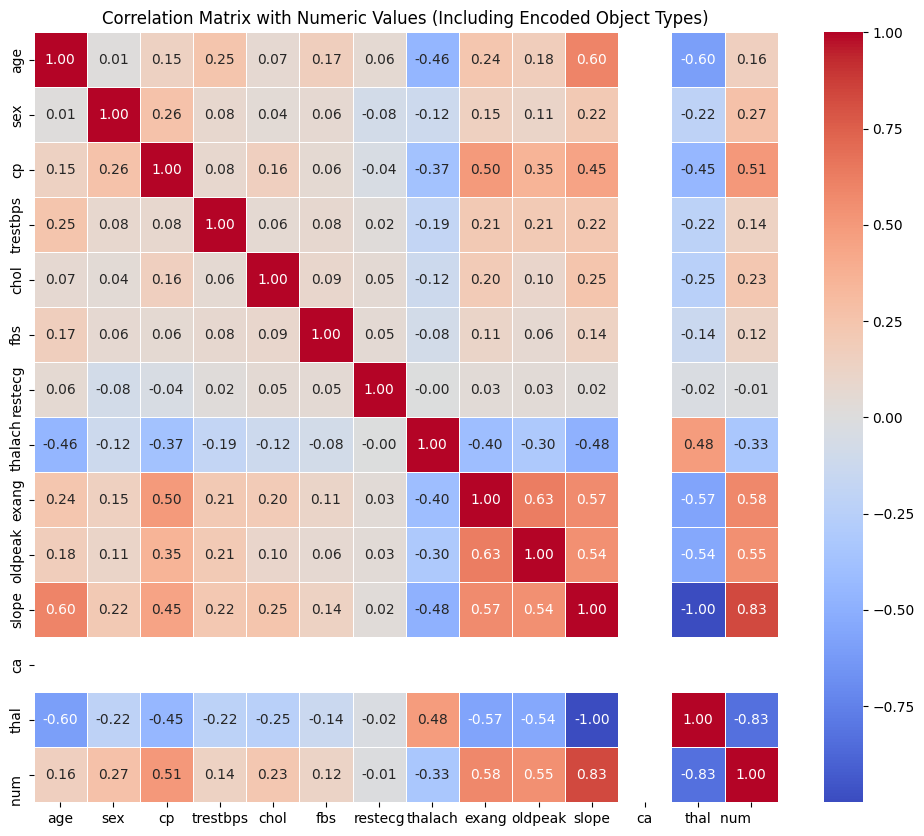

In [26]:
from sklearn.preprocessing import LabelEncoder

df_encoded = dataset.copy()
label_encoders = {}

for column in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix with Numeric Values (Including Encoded Object Types)')
plt.show()

From this dataset we can see that there are not missing or null values. Although, there is an entire feature with 0. And an entire feature with 1. This makes the Dataset difficult to use , because it is possible to drop the feature and use the rest of the dataset. In general, the classes seem a little bit more balanced, althoug there is an overlayer in thal and all the values are the same, which should be removed or scaled. The same problem persists, as one of the main problems are the label names, which are not clear enough to understand what the values represent. 

## Parte 5

In [29]:
url = 'Exam1_df/data4.csv'
dataset = pd.read_csv(url)

In [33]:
dataset.describe(include= 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.642857,247.476190,0.068027,0.217687,139.081633,0.302721,0.586054,0.360544
std,7.811812,0.447533,0.965117,17.625755,66.964851,0.252222,0.460257,23.563873,0.460219,0.908648,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,205.250000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,238.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,278.500000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


In [34]:

dataset.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    int64  
 4   chol        294 non-null    int64  
 5   fbs         294 non-null    int64  
 6   restecg     294 non-null    int64  
 7   thalach     294 non-null    int64  
 8   exang       294 non-null    int64  
 9   oldpeak     294 non-null    float64
 10  num         294 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 25.4 KB


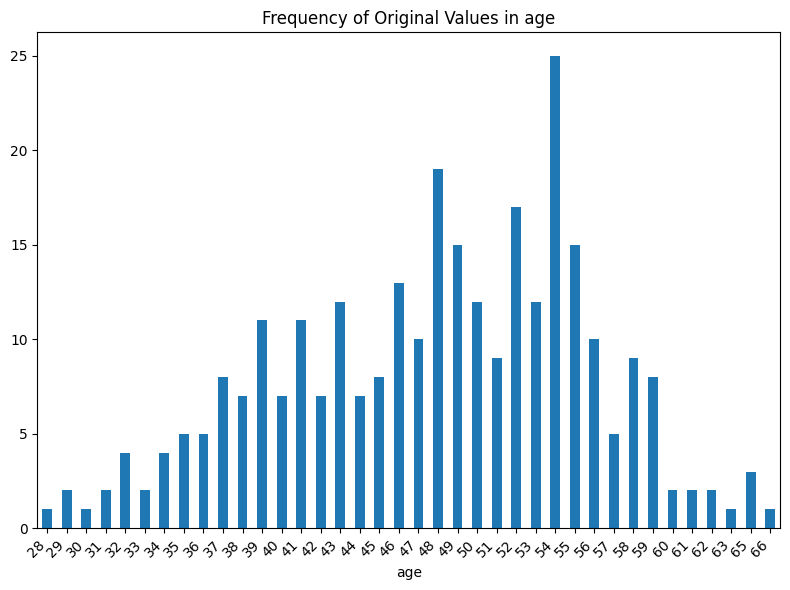

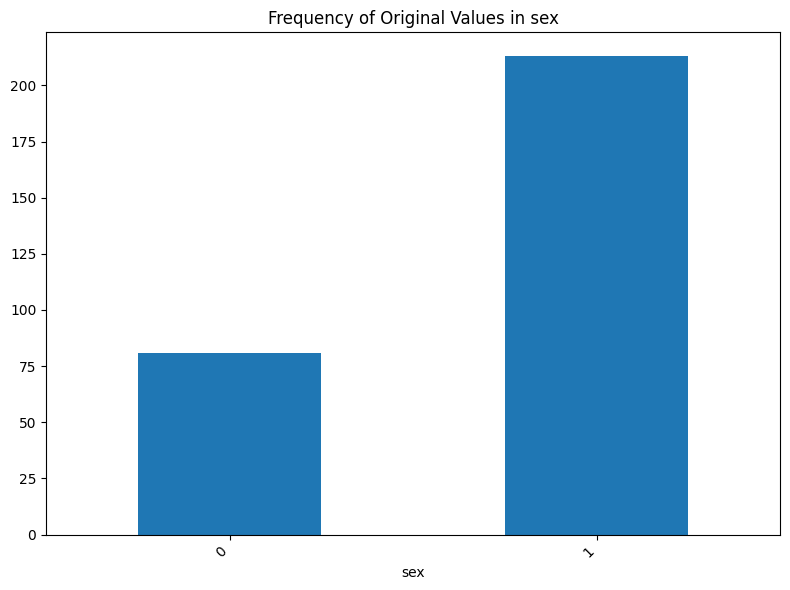

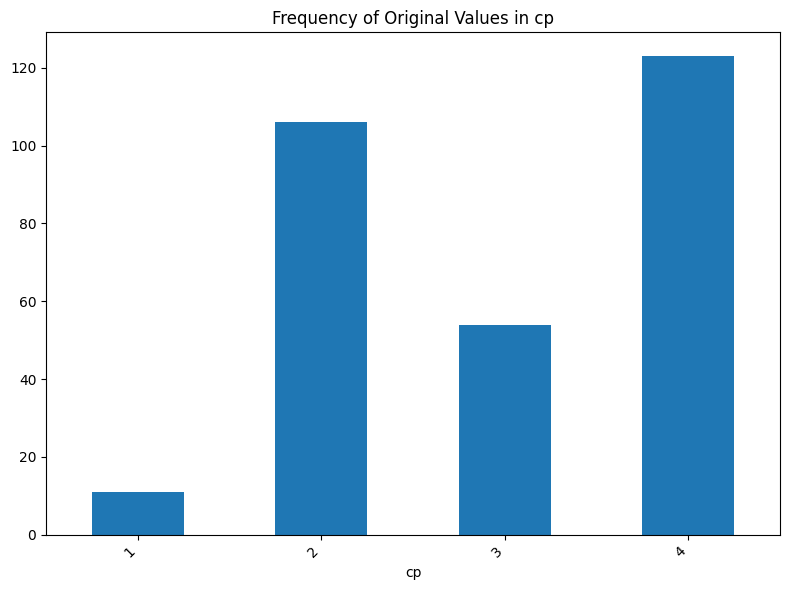

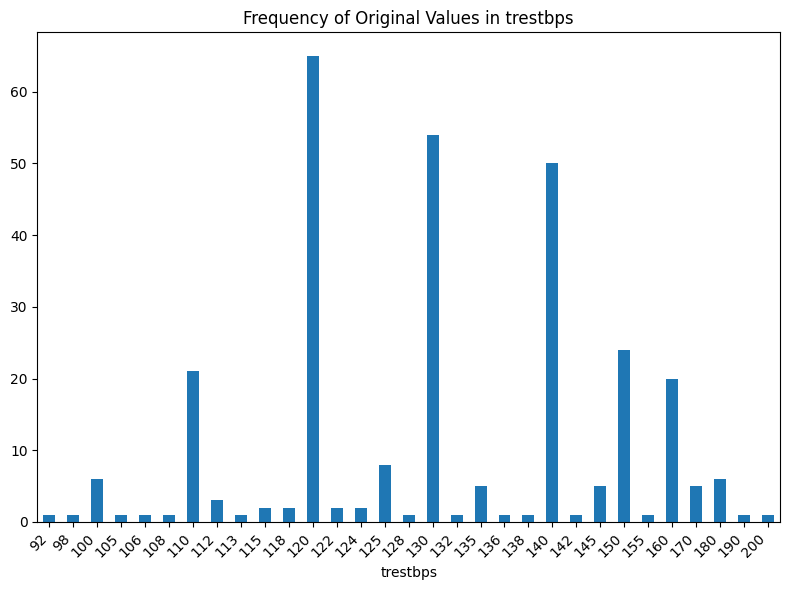

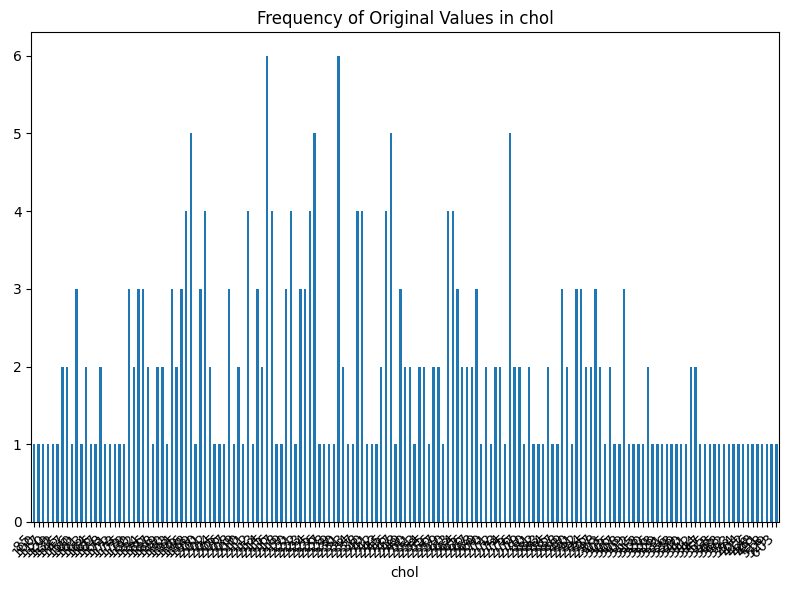

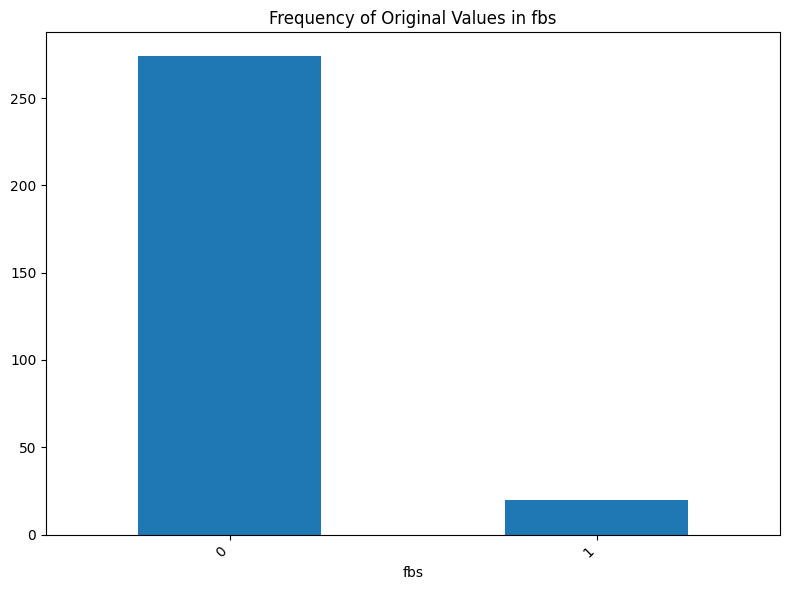

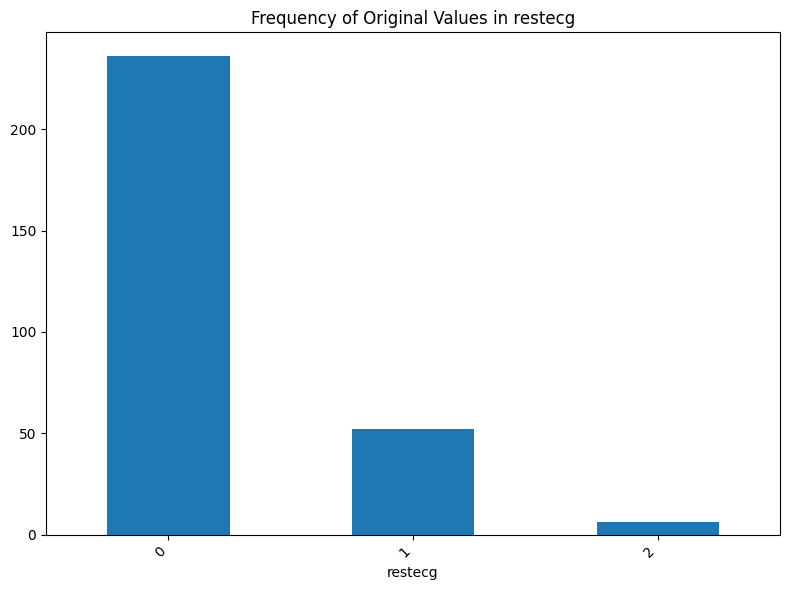

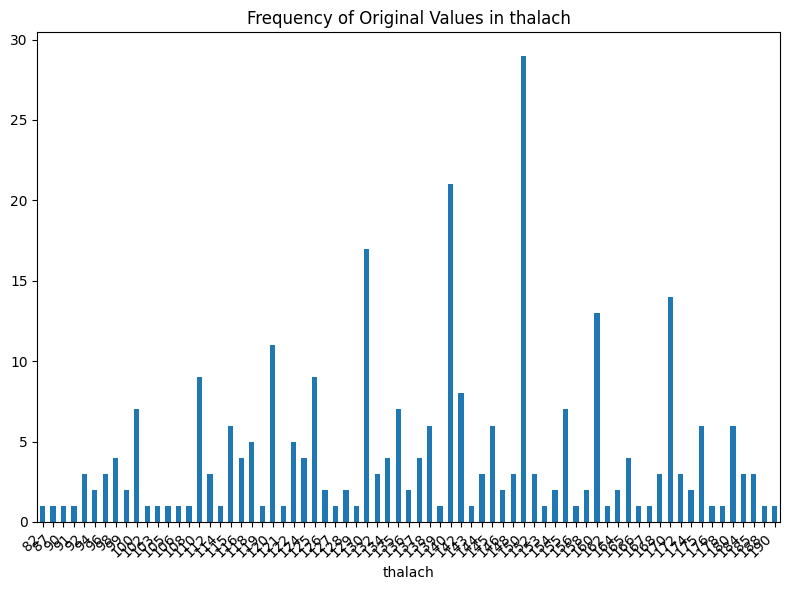

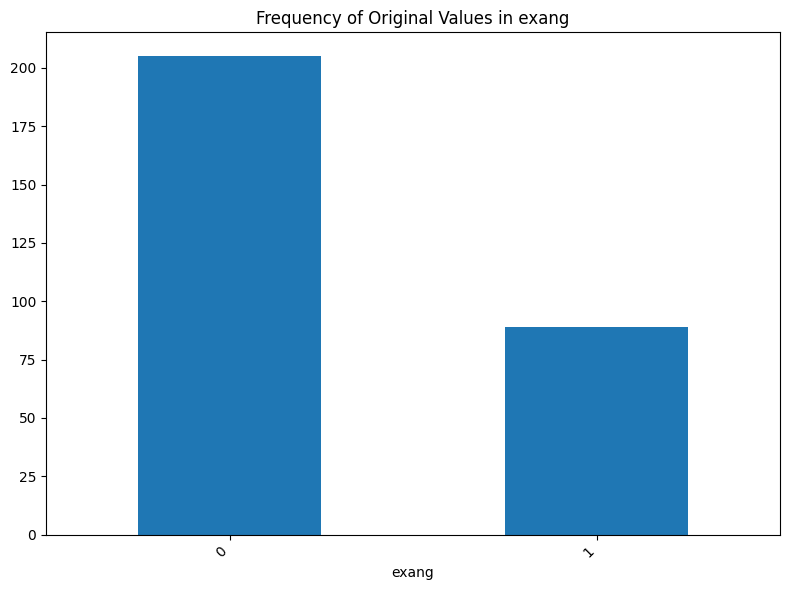

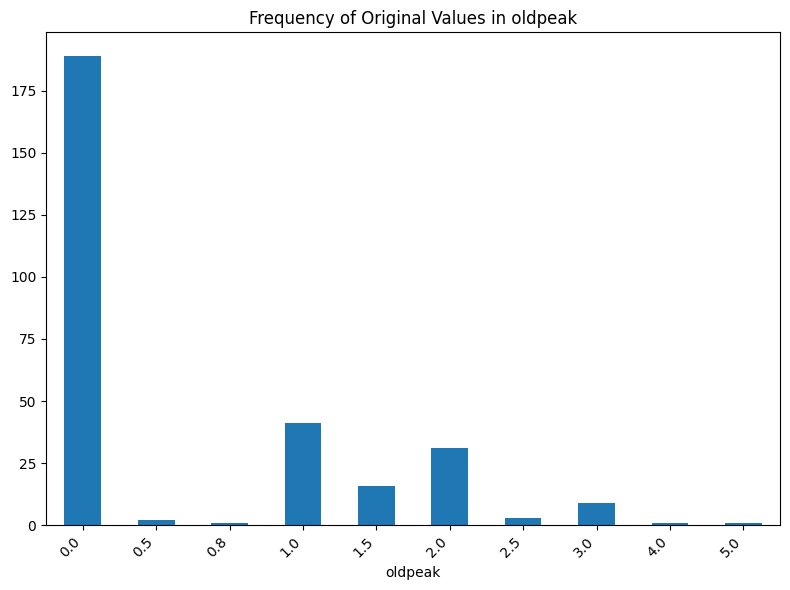

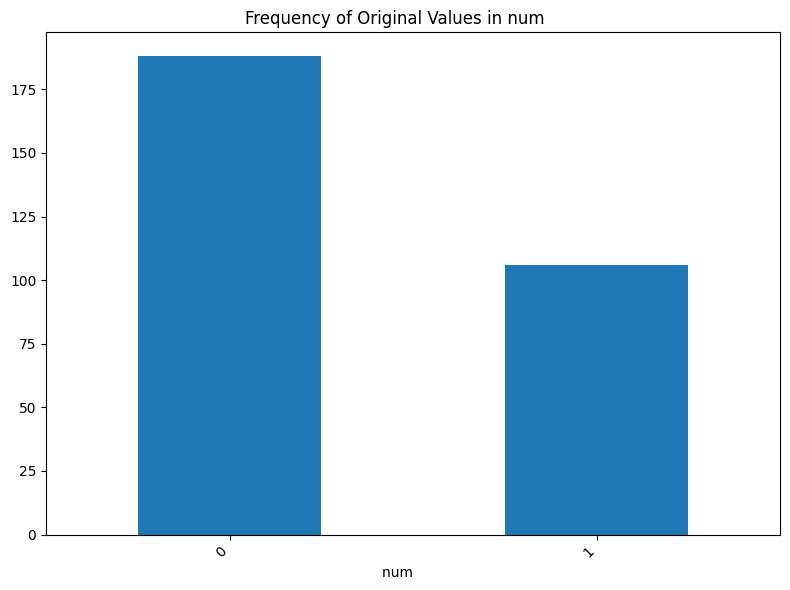

In [31]:

for col in dataset.columns:
    plt.figure(figsize=(8, 6))
    dataset[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f"Frequency of Original Values in {col}")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.show()

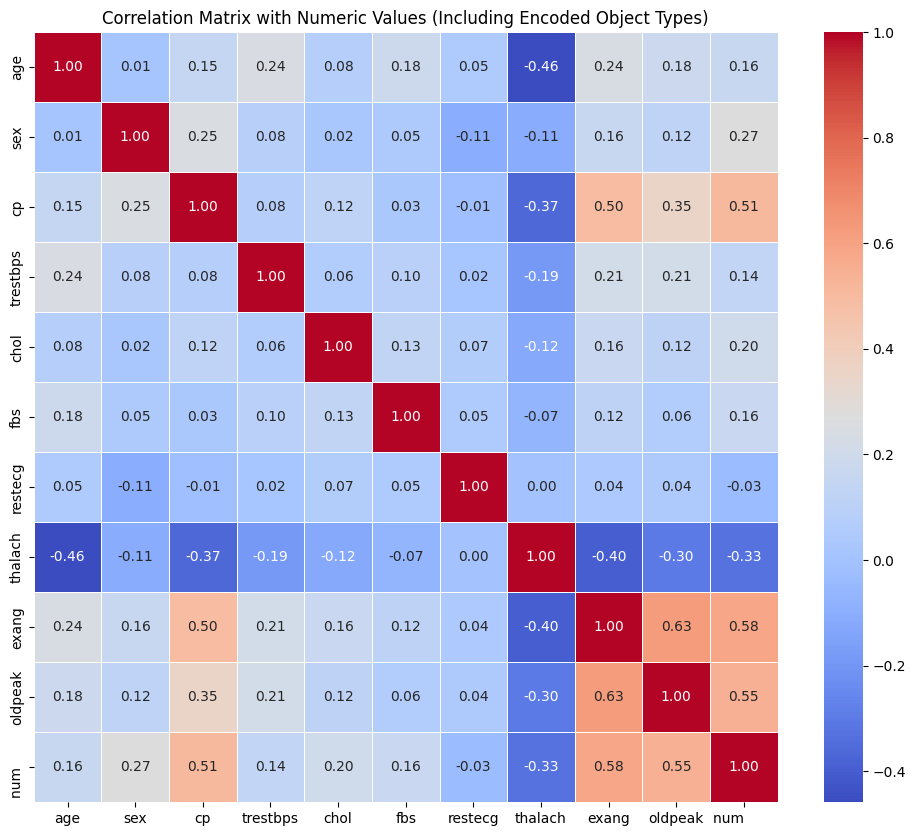

In [32]:
from sklearn.preprocessing import LabelEncoder

df_encoded = dataset.copy()
label_encoders = {}

for column in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix with Numeric Values (Including Encoded Object Types)')
plt.show()

From this dataset we can see that there are not missing or null values. This is the best dataset we can use as there are no clear overlayers, and data is distributed in a better way from looking at the std. The features have a somewhat bad correlation, but the data is the best distributed so far 

### Conclusion

The dataset that is ready without cleaning is the data4.csv as discussed previously, it is the one that has the best distribution of instances between the features. The way this was identified was by doing a EDA (Exploratory Data Analysis) by plotting the values, looking and box plots and pie charts, checking correlation and checking if the features are really important for the dataset. The way we could fix missing values is by using a SimpleImputer that can fill the values with the most frequent or median value of the other instances. For the imblanced values, techniques such as SMOTE can be helpful to balance the classes to represent in a better way the values. This problems would affect the dataset as the values are in such a bad shape that some datasets are unable to get processed by the algorithm, also for unblanced classes they may create bias in the model and not be able to detect other clases.


# EXERCISE 2

**Case 1** : All the metrics are great as they have a note over 0.80 in all the metrics, Because this is a voice transcription problem, we are specially interested in the recall and Accuracy (Hence F1-score too), as we are specially interested to identify TP and TN instances correctly (because we just want to transcript when necessary and ignore when not), as the accuracy is 0.90 and recall 0.83 this makes it a good model, although it could get some improvements

**Case 2** : All the metrics are somewhat bat as they dont have a note over 0.85 between all the metrics, Because this is a problem to identify when a machin will fail. It fails its purpose a bit, as in the confusion matrix it is misplacing almost 1/3 of positives in the FN section. On the other side, it is actually good for predicting TN, which shows that the model fails a bit to identify when a machine will fail but can be good to tell that a machine will not fail, Nevertherless, the metrics are really good and discourages the use of the model

**Case 3** : All the metrics are really bad because there are between 0.6 and .8 between all the metrics, Because this is a recomendation system, we are specially interested in the precision, because we want to tell or just articles that the user will like (and it has 0.78, which is not good at all). This model should not be used as the confusion matrix show a lot of FN and FP in the prediction, which represent misrecomendations from the system

# EXERCISE 3

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

Camino encontrado por A* Tree Search: ['A', 'B', 'D', 'E']


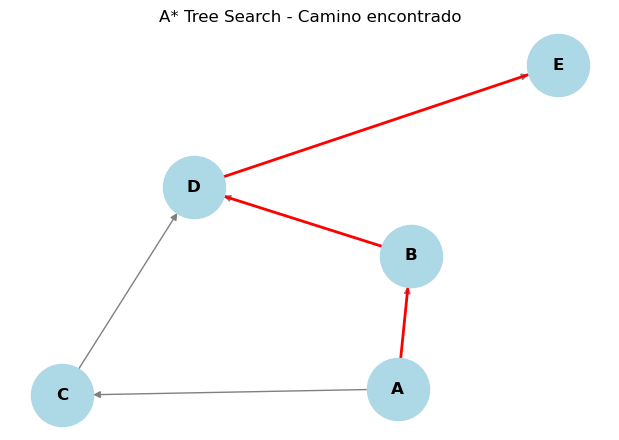

In [3]:


# Grafo con costos y heurística
graph = {
    'A': [('B', 10), ('C', 15)],
    'B': [('D', 12)],
    'C': [('D', 10)],
    'D': [('E', 5)],
    'E': [],
}

heuristic = {
    'A': 20,
    'B': 15,
    'C': 10,
    'D': 5,
    'E': 0,
}

def draw_graph(graph, path, title):
    G = nx.DiGraph()  # Crear un grafo dirigido
    for node, neighbors in graph.items():
        for neighbor, _ in neighbors:
            G.add_edge(node, neighbor)  # Añadir aristas al grafo

    pos = nx.spring_layout(G)  # Layout para la visualización del grafo
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12, font_weight="bold")

    if path:
        path_edges = list(zip(path, path[1:]))  # Crear lista de aristas en el camino
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title(title)
    plt.show()

def a_star_tree_search(graph, start, goal):
    priority_queue = [(heuristic[start], 0, start, [start])]  # (f(n), g(n), nodo, camino)
    while priority_queue:
        _, g, node, path = heapq.heappop(priority_queue)
        if node == goal:
            return path
        for neighbor, cost in graph.get(node, []):
            new_g = g + cost
            f = new_g + heuristic[neighbor]
            heapq.heappush(priority_queue, (f, new_g, neighbor, path + [neighbor]))
    return None

start, goal = 'A', 'E'
path_tree = a_star_tree_search(graph, start, goal)

print("Camino encontrado por A* Tree Search:", path_tree)

# Mostrar el grafo con los caminos encontrados
draw_graph(graph, path_tree, "A* Tree Search - Camino encontrado")
